# File location


## Local
### path='/media/flyranch/14TB_Backup/field_release/'
##### parameter jsonfiles here
### trap_analyzed_path=path+'all_traps_final_analysis_json_files/'
##### trap analyzed jsonfiles here
### wind_data_path=data+'wind_data_files/'
##### wind data files here


## Box
### path='Projects/Field_Trap/'
### param_path=path+'field_trap_jsonfiles_dir/'
##### parameter jsonfiles here
### trap_analyzed_path=path+'all_traps_final_analysis_json_files/'
##### trap analyzed jsonfiles here
### wind_data_path=data+'wind_data_files/'
##### wind data files here


# Time-Speed Plot with Wind Direction

what date did you release flies (e.g. 20220804): 20241006
what time did you release flies (e.g. 142040): 101551
    time  wind_direction  math_direction  wind_speed
52  1015       56.923998       -2.566437    0.974148
53  1016       29.955670       -2.093058    0.766233
54  1017       51.510735       -2.383590    0.845879


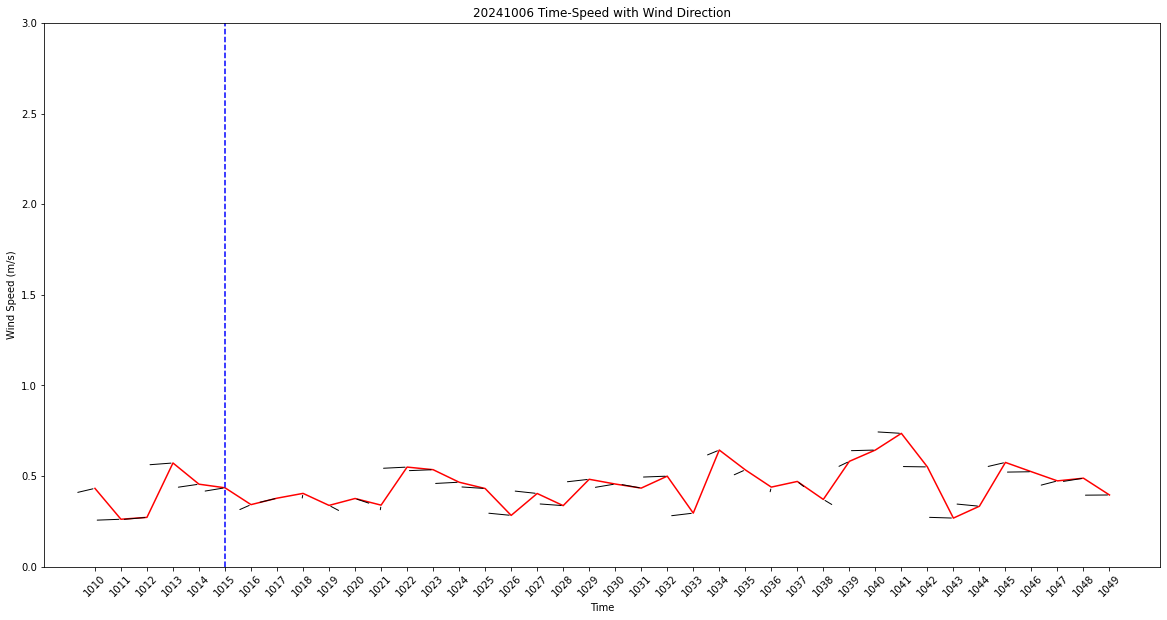

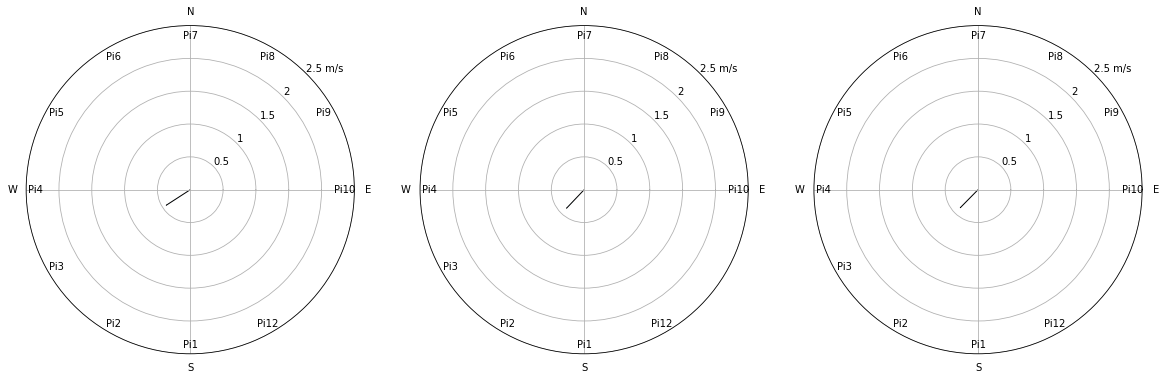

In [1]:
# 20241017

import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib


##### wind speed-time plot with wind direction #####


date=input("what date did you release flies (e.g. 20220804): ")
wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
release=input("what time did you release flies (e.g. 142040): ")

### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path="Projects/Field_Trap/"


data_path=path+"wind_data_files/"
wind_txt=data_path+"anemometer_"+wind_data+".txt"
#out_path='/media/flyranch/data21/field_release/wind_data_files/wind_data_plots/'
out_path=data_path+"wind_data_plots/"

wind_df=pd.read_csv(wind_txt,delimiter=' ',header=None)
wind_df.columns=("time","wind_direction","wind_speed")

time_list=[]

for i in wind_df.iloc[:,0]:
    time=datetime.datetime.fromtimestamp(i)
    str_h=str(time.hour)
    str_m=str(time.minute)
    str_s=str(time.second)
    if len(str_h)==1:
        str_h='0'+str_h
    if len(str_m)==1:
        str_m='0'+str_m
    if len(str_s)==1:
        str_s='0'+str_s
#    str_time=str_h+str_m+str_s # include seconds
    str_time=str_h+str_m
    time_list.append(str_time)
    
wind_df.iloc[:,0]=time_list

rad_d_list=[]
mean_angle_list=[]

for i in range(len(wind_df)): 
    math_d=270-wind_df['wind_direction'][i] # need to convert from weather direction to math angle
    if math_d<0:
        math_d=math_d+360
    rad=np.deg2rad(math_d) # convert to degree to radian
    if i==0:
        rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]==wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:
            rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]!=wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:       
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
            rad_d_list=[]
            rad_d_list.append(rad)

new_wind_df=wind_df.groupby(['time'], as_index=False).mean()

new_wind_df.insert(2,"math_direction",mean_angle_list, True)
#new_wind_df['direction']=mean_angle_list

num=new_wind_df[new_wind_df['time']==release[:4]].index[0]
#print(num)
fil_wind_df=new_wind_df.iloc[num-5:num+35,:]
#print(fil_wind_df)
filtered_wind_df=fil_wind_df.reset_index()

#print(filtered_wind_df)

'''
new_t_list=new_wind_df['time']
new_s_list=new_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=new_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))
'''

new_t_list=filtered_wind_df['time']
new_s_list=filtered_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=filtered_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))

matplotlib.rcParams['pdf.fonttype'] = 42

fig=plt.figure(figsize=(20,10))
ax=plt.axes()

plt.plot(np.array(new_n_list),np.array(new_s_list), '-',markersize=6,color="r")
plt.title(date+' Time-Speed with Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks(new_n_list)
ax.set_xticklabels(new_t_list,rotation=45)
ax.set_ylim(0,3)
x_min=np.min(new_n_list)
x_max=np.max(new_n_list)
y_min=np.min(new_s_list)
y_max=np.max(new_s_list)

ratio=(x_max-x_min)/(y_max-y_min) # to adjust arrow length


#print(range(len(new_n_list)))
#print(new_n_list)
#print(new_d_list)

for i in range(len(new_n_list)):
    dx=(np.cos(new_d_list[i]))
    dy=(np.sin(new_d_list[i]))
    ax.annotate("",xy=(new_n_list[i],new_s_list[i]),
               xytext=(new_n_list[i]+dx,
                       new_s_list[i]+3*(dy/ratio)),arrowprops=dict(arrowstyle='-'))
    if new_t_list[i]==release[:4]:
        ax.axvline(x=i+1,ymax=3,ls='--',color='b')


#save_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=save_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_wind_time_plot.svg')
plt.savefig(out_path+date+'_wind_time_plot.pdf',transparent=True,dpi=300)


ind=new_wind_df.index[new_wind_df['time']==release[:4]].tolist()[0]

release_df=new_wind_df.iloc[[ind,ind+1,ind+2]]


print(release_df)

dir_lst=[]
spd_lst=[]
wind_dir_lst=[]
dir_calc_lst=[]
spd_calc_lst=[]
wind_dir_calc_lst=[]
for i in release_df['math_direction']:
    dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(dir_calc_lst)),np.nanmean(np.cos(dir_calc_lst)))
    dir_lst.append(mean_angle)

for i in release_df['wind_direction']:
    wind_dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(wind_dir_calc_lst)),np.nanmean(np.cos(wind_dir_calc_lst)))
    wind_dir_lst.append(mean_angle)    
    
for i in release_df['wind_speed']:
    spd_calc_lst.append(i)
    mean_spd=np.mean(spd_calc_lst)*0.44704
    spd_lst.append(mean_spd)
    
#print(np.rad2deg(dir_lst))
#print(dir_calc_lst)
#print(dir_lst)
#print(spd_lst)
#print(spd_calc_lst)

fig1=plt.figure(figsize=(20,10))

a=1 #number of rows
b=3 #number of columns
c=1 #plot counter

date_list11=["20240905","20240910","20240923","20241006"]
date_list12=["20240708","20240716","20240724","20240807","20240819","20240826"]
date_list8_1=["20240630"]
date_list8_2=["20230725","20230731","20230808","20231003","20231008","20231012"]
date_list8_3=["20230621","20230630"]


if date in date_list12:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        #ax1.set_rticklabels(["",0.5,1,1.5,2,""])
        #wind_d_theta=[dir_lst[i],dir_lst[i]]
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],marker=(3,0,dir_lst[i]),markersize=10,ls='--',color='k')
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],ls='-',color='k')

        #cor_x=np.cos(dir_lst[i])#*spd_lst[i]
        #cor_y=np.sin(dir_lst[i])#*spd_lst[i]
        #print(cor_x)
        #print(cor_y)
        #ax1.set_theta_zero_location('N')
        #ax1.set_theta_direction('clockwise')
        #arr1=plt.arrow(0,0,cor_x,cor_y,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
        #             edgecolor='black',facecolor='black',lw=2,zorder=5)
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])#,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
                     #edgecolor='black',facecolor='black',lw=2,zorder=5)

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1
        
elif date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            if not n==11:
                ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                    ha='center',va='center')

        c=c+1
        
elif date in date_list8_1:
    pi_loc_lst=np.arange(0,360,45)
    pi_name_lst=[10,6,5,4,3,2,1,8]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(30)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1

elif date in date_list8_2:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[2,1,8,7,6,5,4,3]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    

elif date in date_list8_3:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[6,5,4,3,2,1,8,7]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    
            
        
plt.savefig(out_path+date+'_initial_3_mins_wind.pdf',transparent=True,dpi=300)




# with Heatmap

what date did you release flies (e.g. 20220804): 20241006
what time did you release flies (e.g. 142040): 101551
    time  wind_direction  math_direction  wind_speed
52  1015       56.923998       -2.566437    0.974148
53  1016       29.955670       -2.093058    0.766233
54  1017       51.510735       -2.383590    0.845879
trap10
trap9
trap8
trap7
trap6
trap5
trap4
trap3
trap2
trap1
trap12


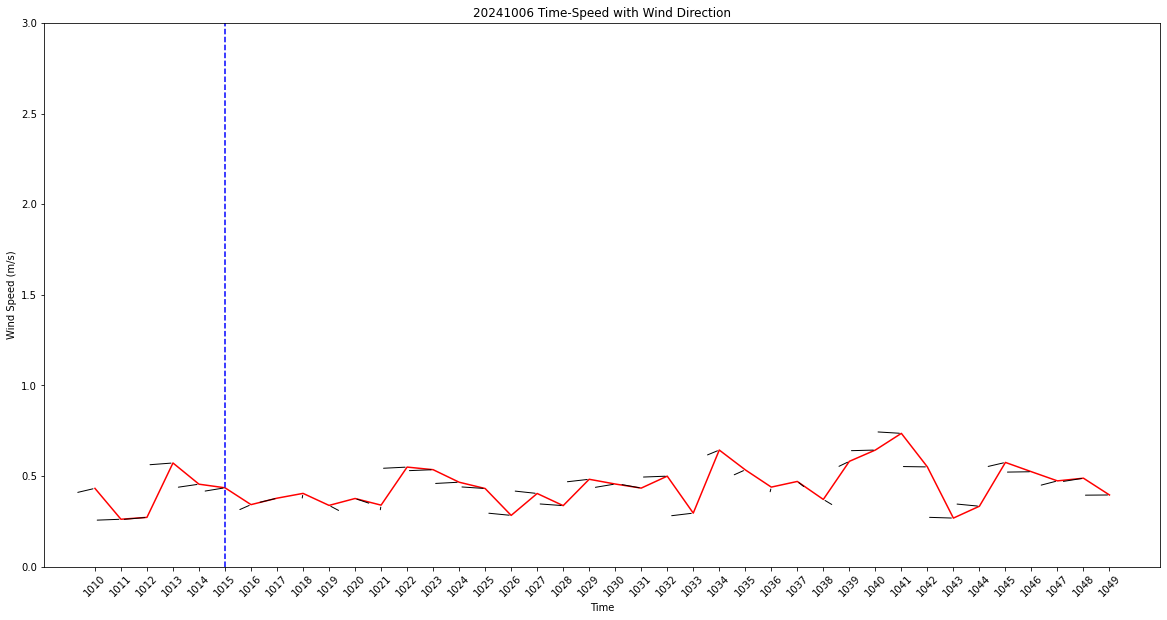

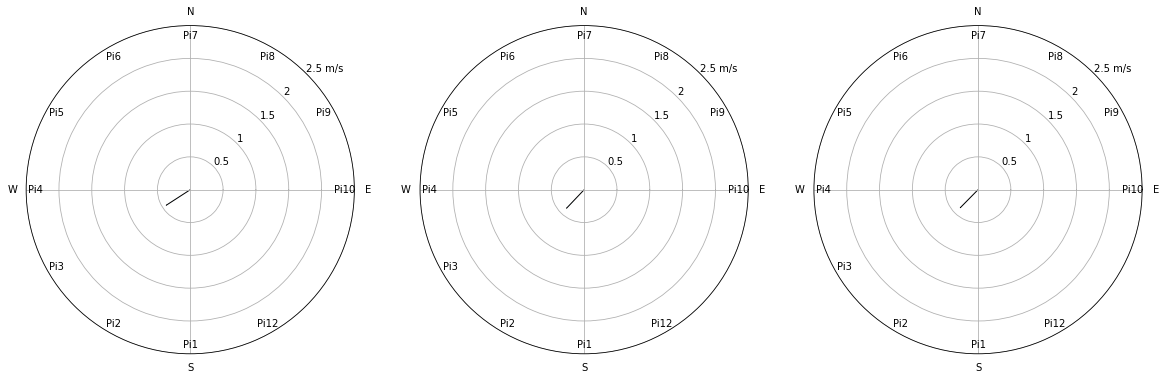

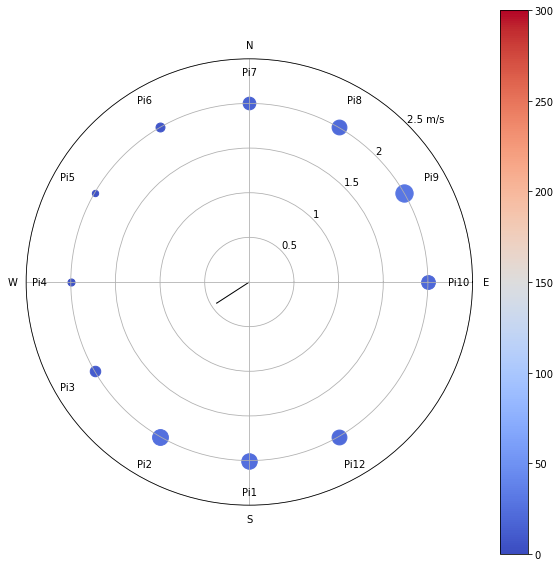

In [3]:
## 20241017

import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib


##### wind speed-time plot with wind direction #####


date=input("what date did you release flies (e.g. 20220804): ")
#date='20241006'
wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
release=input("what time did you release flies (e.g. 142040): ")
#release='101551'

### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/"


data_path=path+"wind_data_files/"
wind_txt=data_path+"anemometer_"+wind_data+".txt"
#out_path='/media/flyranch/data21/field_release/wind_data_files/wind_data_plots/'
out_path=data_path+"wind_data_plots/"

wind_df=pd.read_csv(wind_txt,delimiter=' ',header=None)
wind_df.columns=("time","wind_direction","wind_speed")

time_list=[]

for i in wind_df.iloc[:,0]:
    time=datetime.datetime.fromtimestamp(i)
    str_h=str(time.hour)
    str_m=str(time.minute)
    str_s=str(time.second)
    if len(str_h)==1:
        str_h='0'+str_h
    if len(str_m)==1:
        str_m='0'+str_m
    if len(str_s)==1:
        str_s='0'+str_s
#    str_time=str_h+str_m+str_s # include seconds
    str_time=str_h+str_m
    time_list.append(str_time)
    
wind_df.iloc[:,0]=time_list

rad_d_list=[]
mean_angle_list=[]

for i in range(len(wind_df)): 
    math_d=270-wind_df['wind_direction'][i] # need to convert from weather direction to math angle
    if math_d<0:
        math_d=math_d+360
    rad=np.deg2rad(math_d) # convert to degree to radian
    if i==0:
        rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]==wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:
            rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]!=wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:       
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
            rad_d_list=[]
            rad_d_list.append(rad)

new_wind_df=wind_df.groupby(['time'], as_index=False).mean()

new_wind_df.insert(2,"math_direction",mean_angle_list, True)
#new_wind_df['direction']=mean_angle_list

num=new_wind_df[new_wind_df['time']==release[:4]].index[0]
#print(num)
fil_wind_df=new_wind_df.iloc[num-5:num+35,:]
#print(fil_wind_df)
filtered_wind_df=fil_wind_df.reset_index()

#print(filtered_wind_df)

'''
new_t_list=new_wind_df['time']
new_s_list=new_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=new_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))
'''

new_t_list=filtered_wind_df['time']
new_s_list=filtered_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=filtered_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))

matplotlib.rcParams['pdf.fonttype'] = 42

fig=plt.figure(figsize=(20,10))
ax=plt.axes()

plt.plot(np.array(new_n_list),np.array(new_s_list), '-',markersize=6,color="r")
plt.title(date+' Time-Speed with Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks(new_n_list)
ax.set_xticklabels(new_t_list,rotation=45)
ax.set_ylim(0,3)
x_min=np.min(new_n_list)
x_max=np.max(new_n_list)
y_min=np.min(new_s_list)
y_max=np.max(new_s_list)

ratio=(x_max-x_min)/(y_max-y_min) # to adjust arrow length


#print(range(len(new_n_list)))
#print(new_n_list)
#print(new_d_list)

for i in range(len(new_n_list)):
    dx=(np.cos(new_d_list[i]))
    dy=(np.sin(new_d_list[i]))
    ax.annotate("",xy=(new_n_list[i],new_s_list[i]),
               xytext=(new_n_list[i]+dx,
                       new_s_list[i]+3*(dy/ratio)),arrowprops=dict(arrowstyle='-'))
    if new_t_list[i]==release[:4]:
        ax.axvline(x=i+1,ymax=3,ls='--',color='b')


#save_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=save_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_wind_time_plot.svg')
plt.savefig(out_path+date+'_wind_time_plot.pdf',transparent=True,dpi=300)


ind=new_wind_df.index[new_wind_df['time']==release[:4]].tolist()[0]

release_df=new_wind_df.iloc[[ind,ind+1,ind+2]]


print(release_df)

dir_lst=[]
spd_lst=[]
wind_dir_lst=[]
dir_calc_lst=[]
spd_calc_lst=[]
wind_dir_calc_lst=[]
for i in release_df['math_direction']:
    dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(dir_calc_lst)),np.nanmean(np.cos(dir_calc_lst)))
    dir_lst.append(mean_angle)

for i in release_df['wind_direction']:
    wind_dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(wind_dir_calc_lst)),np.nanmean(np.cos(wind_dir_calc_lst)))
    wind_dir_lst.append(mean_angle)    
    
for i in release_df['wind_speed']:
    spd_calc_lst.append(i)
    mean_spd=np.mean(spd_calc_lst)*0.44704
    spd_lst.append(mean_spd)
    
#print(np.rad2deg(dir_lst))
#print(dir_calc_lst)
#print(dir_lst)
#print(spd_lst)
#print(spd_calc_lst)

fig1=plt.figure(figsize=(20,10))

a=1 #number of rows
b=3 #number of columns
c=1 #plot counter

date_list11=["20240905","20240910","20240923","20241006"]
date_list12=["20240708","20240716","20240724","20240807","20240819","20240826"]
date_list8_1=["20240630"]
date_list8_2=["20230725","20230731","20230808","20231003","20231008","20231012"]
date_list8_3=["20230621","20230630"]


if date in date_list12:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        #ax1.set_rticklabels(["",0.5,1,1.5,2,""])
        #wind_d_theta=[dir_lst[i],dir_lst[i]]
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],marker=(3,0,dir_lst[i]),markersize=10,ls='--',color='k')
        #ax1.plot(wind_d_theta,[0,spd_lst[i]],ls='-',color='k')

        #cor_x=np.cos(dir_lst[i])#*spd_lst[i]
        #cor_y=np.sin(dir_lst[i])#*spd_lst[i]
        #print(cor_x)
        #print(cor_y)
        #ax1.set_theta_zero_location('N')
        #ax1.set_theta_direction('clockwise')
        #arr1=plt.arrow(0,0,cor_x,cor_y,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
        #             edgecolor='black',facecolor='black',lw=2,zorder=5)
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])#,alpha=0.5,width=0.05,head_width=0.2,head_length=0.1,
                     #edgecolor='black',facecolor='black',lw=2,zorder=5)

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1
        
elif date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        #ax1.set_rticklabels(labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])
        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            if not n==11:
                ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                    ha='center',va='center')

        c=c+1
        
elif date in date_list8_1:
    pi_loc_lst=np.arange(0,360,45)
    pi_name_lst=[10,6,5,4,3,2,1,8]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(30)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1

elif date in date_list8_2:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[2,1,8,7,6,5,4,3]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    

elif date in date_list8_3:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[6,5,4,3,2,1,8,7]    

    for i in range(len(release_df)):
        ax1=plt.axes()
        ax1=plt.subplot(a,b,c, polar=True)
        ax1.set_rlim([0,2.5])
        ax1.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
        ax1.set_rlabel_position(45)


        thetaticks=np.arange(0,360,90)
        ax1.set_thetagrids(thetaticks,['E','N','W','S'])

        arr=plt.arrow(0,0,dir_lst[i],spd_lst[i])

        for n in range(len(pi_loc_lst)):
            ax1.text(np.radians(pi_loc_lst[n]),ax1.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')

        c=c+1    
            
        
plt.savefig(out_path+date+'_initial_3_mins_wind.pdf',transparent=True,dpi=300)



### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/field_trap_jsonfiles_dir/"

fig2,ax2=plt.subplots(figsize=(10,10),subplot_kw={'projection':'polar'})

with open(path+'field_parameters_kh.json', 'r') as file:
    data = json.load(file)
file.close()
'''
collection_list=[]
for pi in pi_name_lst:
    if 'trap'+str(pi) in data["collections"][date].keys():
        print('trap'+str(pi))
        collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

collection_list.append(0)
#test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
r_list=[2]*12
'''

if date in date_list12:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,11]

    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    #test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
    r_list=[2]*12    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar()


elif date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    #test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
    r_list=[2]*12    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        if not n==11:
            ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                     ha='center',va='center')
    plt.colorbar()

elif date in date_list8_1:
    pi_loc_lst=np.arange(0,360,45)
    pi_name_lst=[10,6,5,4,3,2,1,8]   
    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    r_list=[2]*8    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar()

elif date in date_list8_2:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[2,1,8,7,6,5,4,3]    
    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    r_list=[2]*8    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar() 
    
elif date in date_list8_3:
    pi_loc_lst=np.arange(22.5,360,45)
    pi_name_lst=[6,5,4,3,2,1,8,7]   
    collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])        

    collection_list.append(0)
    r_list=[2]*8    
        
    ax2.set_rlim(0,2.5)
    ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,dir_lst[0],spd_lst[0])
    for n in range(len(pi_loc_lst)):
        plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                ha='center',va='center')
    plt.colorbar() 
    
plt.savefig(out_path+date+'_fly_collection_VS_initial_1_min_wind.pdf',transparent=True,dpi=300)


# Box and Whisker Plot for wind Data

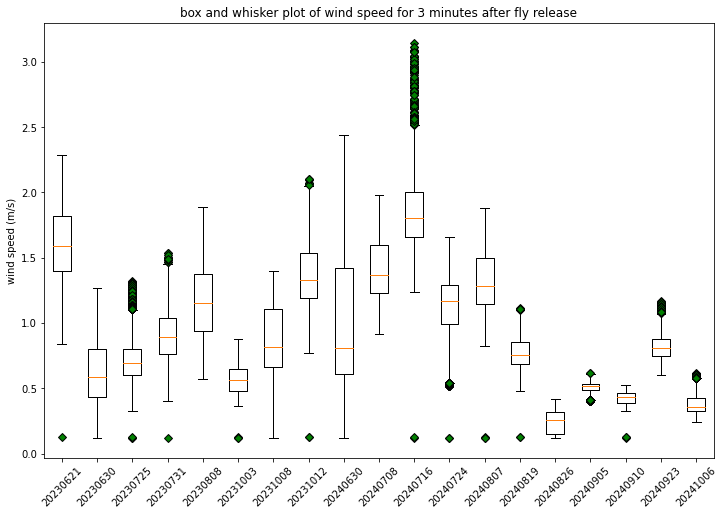

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib
##### box and whisker plot of wind speed for 3 minutes after fly release #####


date_list=["20230621","20230630","20230725","20230731","20230808","20231003",
           "20231008","20231012","20240630","20240708","20240716","20240724",
           "20240807","20240819","20240826","20240905","20240910","20240923","20241006"]
#"20220804","20220914","20220923"
#"20190706","20190611","20190508","20190419"
release_list=["123200","094055","113037","105622","094526","154610",
              "122251","135550","112239","090049","094420","082053",
              "074202","081047","082421","084649","082316","082010","101551"]
#"105542","113540","114246"
#"081100","074800","100400","115600"
#date=input("what date did you,release flies (e.g. 20220804): ")
#date="20230731"
#wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
#release=input("what time did you release flies (e.g. 142040): ")
#release="105622"
#data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"

### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/"


data_list=[]

for date in date_list:
    wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
    release=release_list[date_list.index(date)]
    #print(release)
    #data_path="/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/anemometer_"
    data_path=path+"wind_data_files/"
    directory=data_path+"anemometer_"+wind_data+".txt"
    wind_df=pd.read_csv(directory,delimiter=' ',header=None)
    wind_df.columns=("time","direction","wind_speed")
    time_list=[]

    for i in wind_df.iloc[:,0]:
        time=datetime.datetime.fromtimestamp(i)
        str_h=str(time.hour)
        str_m=str(time.minute)
        str_s=str(time.second)
        if len(str_h)==1:
            str_h='0'+str_h
        if len(str_m)==1:
            str_m='0'+str_m
        if len(str_s)==1:
            str_s='0'+str_s
        str_time=str_h+str_m+str_s # include seconds
        #str_time=str_h+str_m
        int_time=int(str_h)*3600+int(str_m)*60+int(str_s)
        time_list.append(int_time)

    ### adjust
    wind_df.iloc[:,0]=time_list
    ### focus on 5minutes after release
    release_in_sec=int(release[:2])*3600+int(release[2:4])*60+int(release[4:])
    release_in_sec_plus_3min=release_in_sec+180
    #this_time=int(wind_df['time'][:2])*3600+int(wind_df['time'][2:4])*60+int(wind_df['time'][4:])
    new_wind_df=wind_df.loc[(release_in_sec<=wind_df['time'])&(wind_df['time']<=release_in_sec_plus_3min)]
    #new_wind_df=wind_df.loc[(release<=wind_df['time'])&(wind_df['time']<=str(int(release)+5))]   

    td_list=[]
    #print(new_wind_df.iloc[:,0])
    #for i in new_wind_df.iloc[:,0]:
    #    if int(i)<36000:
    #        td=str(timedelta(seconds=i))[:1]+str(timedelta(seconds=i))[2:4]+str(timedelta(seconds=i))[5:7]
    #    else:
    #        td=str(timedelta(seconds=i))[:2]+str(timedelta(seconds=i))[3:5]+str(timedelta(seconds=i))[6:8]
    #    td_list.append(td)
        
    #new_wind_df.iloc[:,0]=td_list
    spd_list=new_wind_df['wind_speed']*.44704 # convert mph to m/s

    matplotlib.rcParams['pdf.fonttype'] = 42
    green_diamond = dict(markerfacecolor='g', marker='D')
    data=spd_list
    data_list.append(data)

fig,ax=plt.subplots(figsize=(12,8))
#ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release \n the last 4 from Kate Leitch's data")
ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release")
ax.boxplot(data_list, flierprops=green_diamond)
ax.set_xticklabels(date_list,rotation=45)
ax.set_ylabel("wind speed (m/s)")

out_path=data_path+"wind_data_plots/boxplot_for_wind_data.pdf"

#plt.savefig('/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/wind_data_plots/boxplot_for_wind_data.pdf')
plt.savefig(out_path,transparent=True,dpi=300)

12:32:00
09:40:55
11:30:37
10:56:22
09:45:26
15:46:10
12:22:51
13:55:50
11:22:39
09:00:49
09:44:20
08:20:53
07:42:02
08:10:47
08:24:21
08:46:49
08:23:16
08:20:10
10:15:51


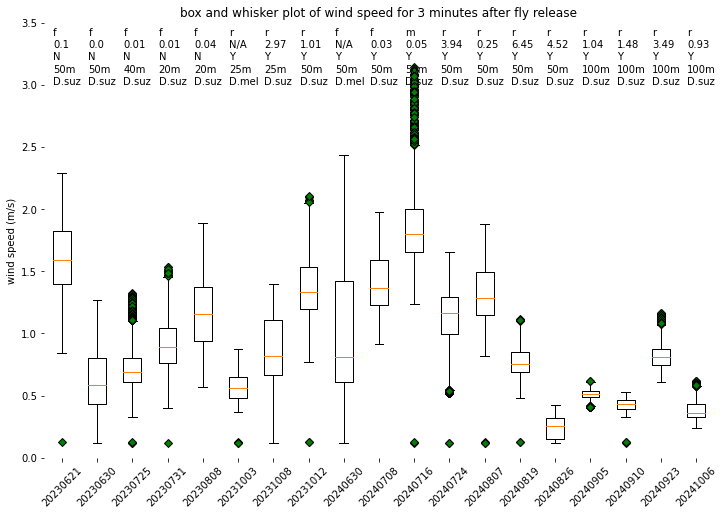

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib


### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/field_trap_jsonfiles_dir/"


with open(path+'field_parameters_kh.json', 'r') as file:
    data=json.load(file)
file.close()


date_list=[]
for date in data["dates"]:
    date_list.append(date)
    
release_list=[]
for DATE,release_time in data["time_of_fly_release"].items():
    if DATE in date_list:
        release_list.append(release_time)

species_list=[] 
for DATE,species in data["species"].items():
    if DATE in date_list:
        species_list.append(species)
        
n_flies_list=[]
for DATE,n_flies in data["estimated_number_of_flies_released"].items():
    if DATE in date_list:
        n_flies_list.append(n_flies)
        
baits_list=[]
for DATE, bait in data["baits"].items():
    if DATE in date_list:
        if bait=="fermented bait" or bait=="red wine+vinegar":
            baits_list.append(bait)
        else:
            baits_list.append('mix')            
        
distance_list=[]
for DATE, distance in data["distances"].items():
    if DATE in date_list:
        distance_list.append(distance)
        
starvation_list=[]
for DATE, starvation in data["starvation"].items():
    if DATE in date_list:
        starvation_list.append(starvation)
               
collection_list=[]
for DATE,collections in data["collections"].items():
    if DATE in date_list:
        if collections=="not collected":
            collection_list.append('N/A')
        else:
            collection_list.append(collections["all"]["total"])

collection_rate_list=[]
for i in range(len(collection_list)):
    if collection_list[i]=='N/A':
        collection_rate_list.append('N/A')
    else:
        collection_rate_list.append(np.round(collection_list[i]/n_flies_list[i]*100,2))


data_list=[]        
        
for date in date_list:
    wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
    release=release_list[date_list.index(date)]
    print(release)

    ### Box
    #path=Projects/Field_Trap/

    data_path=path+"wind_data_files/"
    directory=data_path+"anemometer_"+wind_data+".txt"
    wind_df=pd.read_csv(directory,delimiter=' ',header=None)
    wind_df.columns=("time","direction","wind_speed")
    time_list=[]

    for i in wind_df.iloc[:,0]:
        time=datetime.datetime.fromtimestamp(i)
        str_h=str(time.hour)
        str_m=str(time.minute)
        str_s=str(time.second)
        if len(str_h)==1:
            str_h='0'+str_h
        if len(str_m)==1:
            str_m='0'+str_m
        if len(str_s)==1:
            str_s='0'+str_s
        str_time=str_h+str_m+str_s # include seconds
        #str_time=str_h+str_m
        int_time=int(str_h)*3600+int(str_m)*60+int(str_s)
        time_list.append(int_time)

    ### adjust
    wind_df.iloc[:,0]=time_list
    ### focus on 5minutes after release
    release_in_sec=int(release[:2])*3600+int(release[3:5])*60+int(release[6:])
    release_in_sec_plus_3min=release_in_sec+180
    #this_time=int(wind_df['time'][:2])*3600+int(wind_df['time'][2:4])*60+int(wind_df['time'][4:])
    new_wind_df=wind_df.loc[(release_in_sec<=wind_df['time'])&(wind_df['time']<=release_in_sec_plus_3min)]
    #new_wind_df=wind_df.loc[(release<=wind_df['time'])&(wind_df['time']<=str(int(release)+5))]   

    td_list=[]
    #print(new_wind_df.iloc[:,0])
    #for i in new_wind_df.iloc[:,0]:
    #    if int(i)<36000:
    #        td=str(timedelta(seconds=i))[:1]+str(timedelta(seconds=i))[2:4]+str(timedelta(seconds=i))[5:7]
    #    else:
    #        td=str(timedelta(seconds=i))[:2]+str(timedelta(seconds=i))[3:5]+str(timedelta(seconds=i))[6:8]
    #    td_list.append(td)
        
    #new_wind_df.iloc[:,0]=td_list
    spd_list=new_wind_df['wind_speed']*.44704 # convert mph to m/s

    matplotlib.rcParams['pdf.fonttype'] = 42
    green_diamond = dict(markerfacecolor='g', marker='D')
    data=spd_list
    data_list.append(data)

fig,ax=plt.subplots(figsize=(12,8))
#ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release \n the last 4 from Kate Leitch's data")
ax.set_title("box and whisker plot of wind speed for 3 minutes after fly release")
ax.boxplot(data_list, flierprops=green_diamond)
ax.set_xticklabels(date_list,rotation=45)
ax.set_ylabel("wind speed (m/s)")
ax.set_ylim(0,3.5)
ax.spines[['right','top','left','bottom']].set_visible(False)


for i in range(len(date_list)):
    ax.text(i+.75,3,species_list[i][:5])
    ax.text(i+.75,3.1,distance_list[i])
    ax.text(i+.75,3.2,starvation_list[i])
    ax.text(i+.75,3.3,collection_rate_list[i])
    ax.text(i+.75,3.4,baits_list[i][:1])

    
out_path=data_path+"wind_data_plots/boxplot_for_wind_data_ver2.pdf"

#plt.savefig('/home/flyranch/field_data_and_analysis_scripts/2021lab/wind_data_files/wind_data_plots/boxplot_for_wind_data.pdf')
plt.savefig(out_path,transparent=True,dpi=300)

# Plot for All traps

10
12
1
2
3
4
5
6
7
8
9


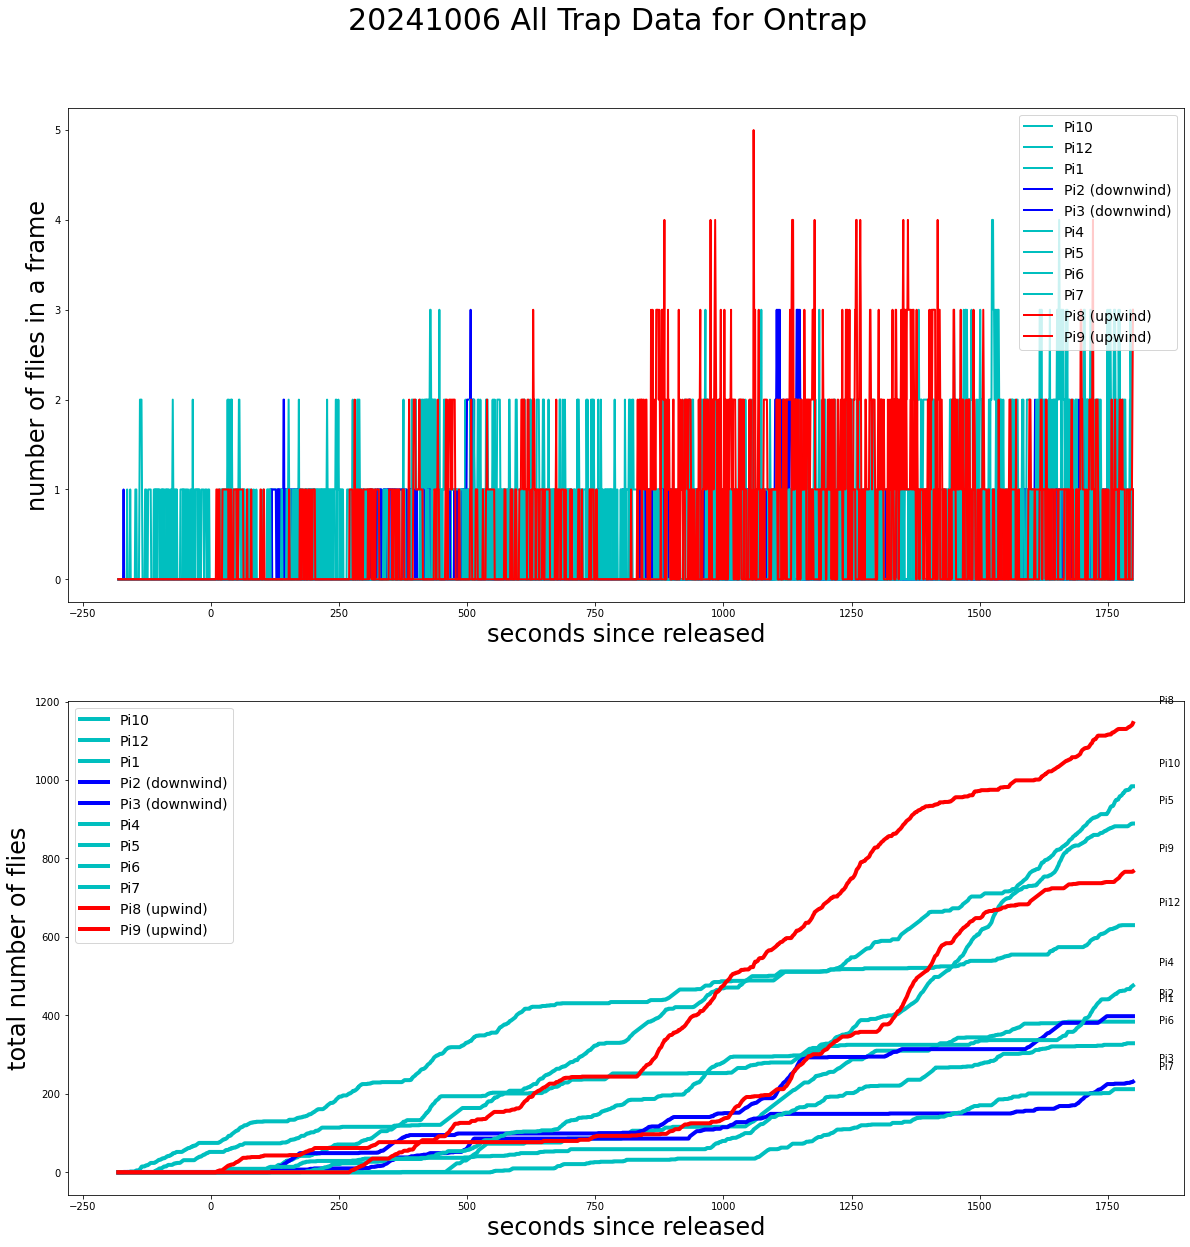

In [6]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys
import glob
import os
import re
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline


def calc_sec_since_release(standard,time_stamp):
	zero=int(standard[0:2])*3600+int(standard[3:5])*60+int(standard[6:8])+1
	sec=int(time_stamp[0:2])*3600+int(time_stamp[3:5])*60+int(time_stamp[6:8])
	sec_since_release=sec-zero
	return sec_since_release

def make_accumulation_list(list):
	acc_list=[]
	for i in range(len(list)):
		ele=np.sum(list[:i+1])
		acc_list.append(ele)
	return acc_list



#date=input("what date data you wanna use to make the plot (e.g. 20220725): ")
date='20241006'
#release=input("What time flies were released? (e.g. 093425) :")
release='101551'
if (len(release)==6 and type(int(release))==int):
	pass
else:
	print("please enter 6 numbers (000000-235959)")
	sys.exit()


### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/field_trap_jsonfiles_dir/"

json_path=path+'all_traps_final_analysis_json_files/'
list_of_files=sorted(glob.glob(json_path+date+'/*/master_*.json'))

released_time=release[0:2]+':'+release[2:4]+':'+release[4:6]

#c=0

with open(path+'wind_direction.json', 'r') as file:
    data = json.load(file)
file.close()

upwind_list=data["wind_direction"][date]["upwind"]
downwind_list=data["wind_direction"][date]["downwind"]
Color=''
matplotlib.rcParams['pdf.fonttype'] = 42

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,20))
fig.suptitle(date+' All Trap Data for Ontrap',size=30,x=0.5,y=0.95)
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

#pdb.set_trace()

for file in list_of_files:
    f=open(file)
    data=json.load(f)
    #create lists
    on_trap_list=[]
    in_trap_list=[]
    sec_since_release_list=[]
    actual_timestamp_list=[]


    string=file
    pattern='master'
    match=(re.search(pattern,string))
    
    j_pattern='.json'
    j_match=(re.finditer(j_pattern,string))
    count=0
    for i in j_match:
        if count==1:
            jj_match=i
        count+=1
    
    END=match.end()
    START=jj_match.start()
    DIFF=START-END
    
    if DIFF==24:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+9] ###Pi_X
    else:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+10] ###Pi_X
    print(t_name[2:])

    for i in data['trap_'+trap_name]:
        for k in data['trap_'+trap_name][i]:
            if i=="flies on trap over time:":
                on_trap_list.append(k)
            elif i=="flies in trap over time:":
                in_trap_list.append(k)
    #		elif i=="seconds since release:":
    #			sec_since_release_list.append(int(k))
            elif i=="actual timestamp:":
                if len(str(int(k)))==5:
                    str_time='0'+str(int(k))[0:1]+':'+str(int(k))[1:3]+':'+str(int(k))[3:5]
                    actual_timestamp_list.append(str_time)
                elif len(str(int(k)))==6:
                    str_time=str(int(k))[0:2]+':'+str(int(k))[2:4]+':'+str(int(k))[4:6]
                    actual_timestamp_list.append(str_time)

    f.close()

    for i in actual_timestamp_list:
        s=calc_sec_since_release(released_time,i)
        sec_since_release_list.append(s)

    on_trap_acc_list=make_accumulation_list(on_trap_list)
    in_trap_acc_list=make_accumulation_list(in_trap_list)



    #print(on_trap_acc_list)
    #print(Y_)
    #print(sec_since_release_list)


    #ax1.plot(sec_since_release_list, on_trap_list, '-',markersize=6,label='trap_'+trap_name)
    #ax2.plot(actual_timestamp_list, in_trap_list, '-',markersize=6,color="b",label="in trap")
    #ax1.legend(loc="upper right",fontsize=14)

    ###to smooth line plots
    #cubic_interploation_model = interp1d(sec_since_release_list, on_trap_list, kind = "cubic")
    #X_Y_Spline = make_interp_spline(sec_since_release_list, on_trap_list)
    # Plotting the Graph
    #X_=np.linspace(np.array(sec_since_release_list).min(), np.array(sec_since_release_list).max(), 500)
    #Y_=cubic_interploation_model(X_)
    #Y_=X_Y_Spline(X_)

    #for i in range(len(w_lst)):
    #    if w_lst[i][0][0]==int(t_name[-1]):
    
    if int(t_name[2:]) in upwind_list:
        Color='r'
        ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name+' (upwind)',color=Color)
        ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name+' (upwind)',color=Color)
        ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    elif int(t_name[2:]) in downwind_list:
        Color='b'
        ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name+' (downwind)',color=Color)
        ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name+' (downwind)',color=Color)
        ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    else:
        Color='c'
        ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name,color=Color)
        ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name,color=Color)
        ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    #print(Color)
    #ax1.plot(sec_since_release_list,on_trap_list,'-',markersize=6,linewidth=2,label=t_name,color=Color)
    #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')')
    ax1.legend(loc="upper right",fontsize=14)
    ax1.set_xlabel('seconds since released',size=24)
    ax1.set_ylabel('number of flies in a frame',size=24)

    #ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name,color=Color)
    #ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    ax2.legend(loc="upper left",fontsize=14)
    ax2.set_xlabel('seconds since released',size=24)
    ax2.set_ylabel('total number of flies',size=24)

'''
        elif w_lst[i][0][1]==int(t_name[-1]):
            ax1.plot(X_,Y_,'--',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')',color=colors[c])
            #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')')
            ax1.legend(loc="upper right",fontsize=14)
            ax1.set_xlabel('seconds since released',size=24)
            ax1.set_ylabel('number of flies in a frame',size=24)


            ax2.plot(sec_since_release_list,on_trap_acc_list,'--',markersize=6,linewidth=4,label=t_name+'('+wind_dir+')',color=colors[c])
            ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
            ax2.legend(loc="upper left",fontsize=14)
            ax2.set_xlabel('seconds since released',size=24)
            ax2.set_ylabel('total number of flies',size=24)
'''

    #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')',color=colors[c])
    #ax1.plot(X_,Y_,'-',markersize=6,linewidth=2,label=t_name+'('+wind_dir+')')
    #ax1.legend(loc="upper right",fontsize=14)
    #ax1.set_xlabel('seconds since released',size=24)
    #ax1.set_ylabel('number of flies in a frame',size=24)

    #ax2.plot(sec_since_release_list,on_trap_acc_list,'-',markersize=6,linewidth=4,label=t_name+'('+wind_dir+')',color=colors[c])
    #ax2.annotate(t_name,(sec_since_release_list[-1]+50,on_trap_acc_list[-1]+50))
    #ax2.legend(loc="upper left",fontsize=14)
    #ax2.set_xlabel('seconds since released',size=24)
    #ax2.set_ylabel('total number of flies',size=24)

    #c+=1


#data_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=data_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_all_on_trap_data_plot.jpg')
#plt.savefig(ex_path+'/'+date+'_all_on_trap_data_plot.pdf',transparent=True)

out_path=path+'analyzed_plot_figures/'
ex_path=out_path+date

# Check whether the specified path exists or not
isExist = os.path.exists(ex_path)

if not isExist:  
  # Create a new directory because it does not exist 
    os.makedirs(ex_path)

plt.savefig(ex_path+'/'+date+'_all_on_trap_data_plot.pdf',transparent=True,dpi=300)


# Heatmap

Pi1
DOWNwind
Pi2
DOWNwind
Pi7
UPwind
Pi8
UPwind


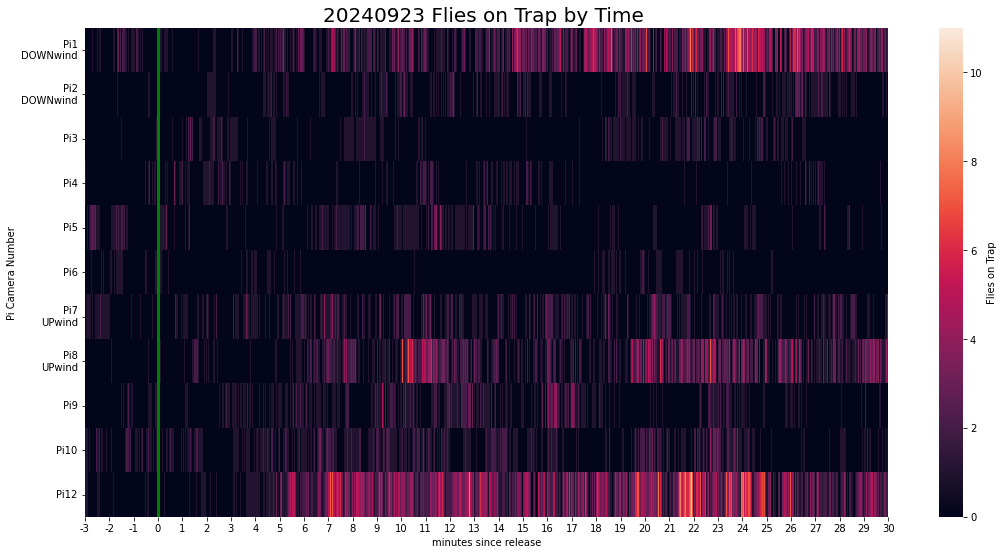

In [7]:
import seaborn as sns
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys
import glob
import os
import re
import pandas as pd
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

matplotlib.rcParams['pdf.fonttype'] = 42


def calc_sec_since_release(standard,time_stamp):
	zero=int(standard[0:2])*3600+int(standard[3:5])*60+int(standard[6:8])+1
	sec=int(time_stamp[0:2])*3600+int(time_stamp[3:5])*60+int(time_stamp[6:8])
	sec_since_release=sec-zero
	return sec_since_release

def make_accumulation_list(list):
	acc_list=[]
	for i in range(len(list)):
		ele=np.sum(list[:i+1])
		acc_list.append(ele)
	return acc_list



#date=input("what date data you wanna use to make the plot (e.g. 20220725): ")
date='20240923'
#release=input("What time flies were released? (e.g. 093425) :")
release='082010'
if (len(release)==6 and type(int(release))==int):
	pass
else:
	print("please enter 6 numbers (000000-235959)")
	sys.exit()


### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/field_trap_jsonfiles_dir/"

json_path=path+'all_traps_final_analysis_json_files/'
list_of_files=sorted(glob.glob(json_path+date+'/*/master_*.json'))

released_time=release[0:2]+':'+release[2:4]+':'+release[4:6]

#c=0

with open(path+'wind_direction.json', 'r') as file:
    data = json.load(file)
file.close()

upwind_list=data["wind_direction"][date]["upwind"]
downwind_list=data["wind_direction"][date]["downwind"]
Color=''

Heat_lst=[]
Trap_name_lst=[]

for file in list_of_files:
    f=open(file)
    data=json.load(f)
    #create lists
    on_trap_list=[]
    in_trap_list=[]
    sec_since_release_list=[]
    actual_timestamp_list=[]


    string=file
    pattern='master'
    match=(re.search(pattern,string))
    
    j_pattern='.json'
    j_match=(re.finditer(j_pattern,string))
    count=0
    for i in j_match:
        if count==1:
            jj_match=i
        count+=1
    
    END=match.end()
    START=jj_match.start()
    DIFF=START-END
    
    if DIFF==24:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+9] ###Pi_X
    else:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+10] ###Pi_X
    #print(t_name[2:])

    for i in data['trap_'+trap_name]:
        for k in data['trap_'+trap_name][i]:
            if i=="flies on trap over time:":
                on_trap_list.append(k)
            elif i=="flies in trap over time:":
                in_trap_list.append(k)
    #		elif i=="seconds since release:":
    #			sec_since_release_list.append(int(k))
            elif i=="actual timestamp:":
                if len(str(int(k)))==5:
                    str_time='0'+str(int(k))[0:1]+':'+str(int(k))[1:3]+':'+str(int(k))[3:5]
                    actual_timestamp_list.append(str_time)
                elif len(str(int(k)))==6:
                    str_time=str(int(k))[0:2]+':'+str(int(k))[2:4]+':'+str(int(k))[4:6]
                    actual_timestamp_list.append(str_time)

    f.close()

    for i in actual_timestamp_list:
        s=calc_sec_since_release(released_time,i)
        sec_since_release_list.append(s)

    on_trap_acc_list=make_accumulation_list(on_trap_list)
    in_trap_acc_list=make_accumulation_list(in_trap_list)

    Heat_lst.append(on_trap_list)
    Trap_name_lst.append(t_name)


fig,ax=plt.subplots(figsize=(18,9))

sorted_Heat_lst=[]
sorted_Trap_name_lst=sorted(Trap_name_lst,key=len)
#print(sorted_Trap_name_lst)
for i in sorted_Trap_name_lst:
    for j in Trap_name_lst:
        if i==j:
            ind=Trap_name_lst.index(j)
            sorted_Heat_lst.append(Heat_lst[ind])

for name in sorted_Trap_name_lst:
    if int(name[2:]) in upwind_list:
        print(sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nUPwind')
        sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]=sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nUPwind'
    elif int(name[2:]) in downwind_list:
        print(sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nDOWNwind')
        sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]=sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nDOWNwind'

    
sorted_heat_df=pd.DataFrame(sorted_Heat_lst,index=sorted_Trap_name_lst)
hm=sns.heatmap(data=sorted_heat_df,cbar_kws={"label":"Flies on Trap"}) 

ax.set_xticks(np.arange(0,len(sorted_Heat_lst[0])+1,60))
ax.set_xticklabels(np.arange(-3,int(((len(sorted_Heat_lst[0])/60)-3+1)),1),rotation=0) ###3 mins before release + 30mins after release
ax.axvline(180,c="g",lw=3)
ax.set_xlabel('minutes since release')
ax.set_ylabel('Pi Camera Number')
ax.set_title(date+" Flies on Trap by Time ",fontsize=20)

out_path=path+'analyzed_plot_figures/'
ex_path=out_path+date

# Check whether the specified path exists or not
isExist = os.path.exists(ex_path)

if not isExist:  
  # Create a new directory because it does not exist 
    os.makedirs(ex_path)

#plt.savefig(ex_path+'/'+date+'_heatmap.pdf',transparent=True,dpi=300)

# command to make a video from images

In [ ]:
ffmpeg -start_number 1461 -i /home/flyranch/field_data_and_analysis_scripts/2021lab/short_videos/20231003/20231003_trap1/tl_0000_%04d.jpg -c:v libx264 -pix_fmt yuv420p -r 5 /home/flyranch/field_data_and_analysis_scripts/2021lab/short_videos/20231003/20231003_trap1/output_3.mp4
    
    
    

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys





# to name output file
ind=0

fig=plt.figure()
ax=plt.axes()
#fig,ax=plt.subplots()

# to set range xlim, ylim
plt.xlim(-60,500)
plt.ylim(-0.5,16)

#x=np.linspace(-60,500)
#y=np.linspace(-0.5,16)

# set labels
plt.xlabel('Time (sec)')
plt.ylabel('Flies at Trap')

#ax.set_xlabel('time since release (sec)')
#ax.set_ylabel('flies at trap')

#set dark back ground
#plt.style.use('dark_background')
ax.patch.set_facecolor('black')
fig.patch.set_facecolor('black')

# set thick param and label color
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')

# hide spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white') 


#in advance, plot data till 360 sec
#plt.plot(sec_since_release_list[:55], on_trap_list[:55], '-',markersize=6,color="r",label="on trap")
#plt.savefig(+str(0)+'.svg')
#pdb.set_trace()

# 360 sec to 760 sec
for i in range(len(sec_since_release_list[:282])):
	#plt.plot(sec_since_release_list[55:i], on_trap_list[55:i], '-',markersize=6,color="r",label="on trap")
	#plt.savefig(+str(ind)+'.svg')
	ind+=1


#plt.savefig(+str(ind)+'.svg',dpi=600)

# for 2025 March talk

## Initial 3 mins wind direction with collection of flies

    time  wind_direction  math_direction  wind_speed
24  0846      308.324957       -0.668940    1.021010
25  0847      297.150875       -0.473661    1.115211
26  0848      313.048413       -0.751348    1.180365
[-0.6689395548757784, -0.57130047614544, -0.6314357103267237]
[0.4564323949650667, 0.4774880574389814, 0.49421549382840874]
3
trap10
trap9
trap8
trap7
trap6
trap5
trap4
trap3
trap2
trap1
trap12
[  0  30  60  90 120 150 180 210 240 270 300 330]
5.846852994181004
12
12
12
[15, 11, 10, 15, 46, 19, 19, 4, 4, 5, 8, 0]
[4, 1, 0, 5, 4, 2, 3, 0, 0, 1, 3, 0]
[11, 10, 10, 10, 42, 17, 16, 4, 4, 4, 5, 0]


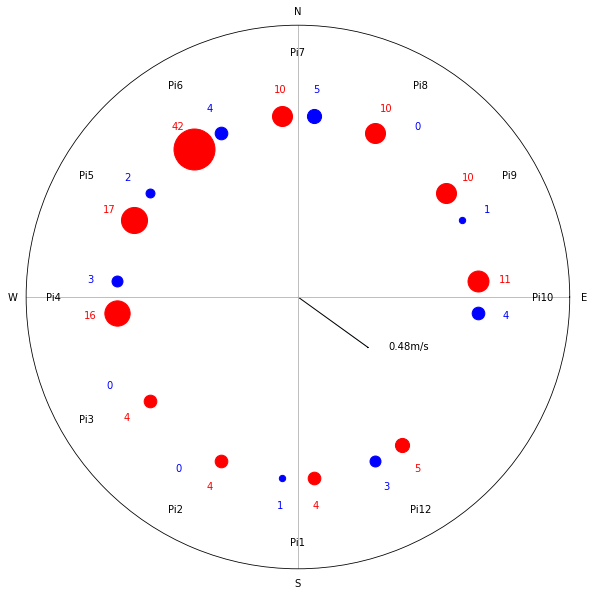

In [10]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib

def normalize_angle(angle):
  """
  Converts an angle to the range of 0 to 360 degrees.

  Args:
    angle: The angle in degrees.

  Returns:
    The normalized angle in the range of 0 to 360 degrees.
  """
  return angle % 360


##### wind speed-time plot with wind direction #####


#date=input("what date did you release flies (e.g. 20220804): ")
date='20240905'
wind_data=date[:4]+"_"+date[4:6]+"_"+date[6:]
#release=input("what time did you release flies (e.g. 142040): ")
release='084649'

### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/"

data_path=path+"wind_data_files/"
wind_txt=data_path+"anemometer_"+wind_data+".txt"

wind_df=pd.read_csv(wind_txt,delimiter=' ',header=None)
wind_df.columns=("time","wind_direction","wind_speed")

time_list=[]

for i in wind_df.iloc[:,0]:
    time=datetime.datetime.fromtimestamp(i)
    str_h=str(time.hour)
    str_m=str(time.minute)
    str_s=str(time.second)
    if len(str_h)==1:
        str_h='0'+str_h
    if len(str_m)==1:
        str_m='0'+str_m
    if len(str_s)==1:
        str_s='0'+str_s
#    str_time=str_h+str_m+str_s # include seconds
    str_time=str_h+str_m
    time_list.append(str_time)
    
wind_df.iloc[:,0]=time_list

rad_d_list=[]
mean_angle_list=[]

for i in range(len(wind_df)): 
    math_d=270-wind_df['wind_direction'][i] # need to convert from weather direction to math angle
    if math_d<0:
        math_d=math_d+360
    rad=np.deg2rad(math_d) # convert to degree to radian
    if i==0:
        rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]==wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:
            rad_d_list.append(rad)
    if (i!=0) and (wind_df['time'][i]!=wind_df['time'][i-1]):
        if i==(len(wind_df)-1):
            rad_d_list.append(rad)
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
        else:       
            mean_angle=np.arctan2(np.nanmean(np.sin(rad_d_list)),np.nanmean(np.cos(rad_d_list)))    
            mean_angle_list.append(mean_angle)
            rad_d_list=[]
            rad_d_list.append(rad)

new_wind_df=wind_df.groupby(['time'], as_index=False).mean()

new_wind_df.insert(2,"math_direction",mean_angle_list, True)
#new_wind_df['direction']=mean_angle_list

num=new_wind_df[new_wind_df['time']==release[:4]].index[0]
#print(num)
fil_wind_df=new_wind_df.iloc[num-5:num+35,:]
#print(fil_wind_df)
filtered_wind_df=fil_wind_df.reset_index()

#print(filtered_wind_df)

'''
new_t_list=new_wind_df['time']
new_s_list=new_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=new_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))
'''

new_t_list=filtered_wind_df['time']
new_s_list=filtered_wind_df['wind_speed']*0.44704 # convert mph to m/s
#new_d_list=new_wind_df['direction']
new_d_list=filtered_wind_df['math_direction']
new_n_list=list(np.arange(1,len(new_t_list)+1))

matplotlib.rcParams['pdf.fonttype'] = 42
'''
fig=plt.figure(figsize=(20,10))
ax=plt.axes()

plt.plot(np.array(new_n_list),np.array(new_s_list), '-',markersize=6,color="r")
plt.title(date+' Time-Speed with Wind Direction')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
ax.set_xticks(new_n_list)
ax.set_xticklabels(new_t_list,rotation=45)
ax.set_ylim(0,3)
x_min=np.min(new_n_list)
x_max=np.max(new_n_list)
y_min=np.min(new_s_list)
y_max=np.max(new_s_list)

ratio=(x_max-x_min)/(y_max-y_min) # to adjust arrow length


#print(range(len(new_n_list)))
#print(new_n_list)
#print(new_d_list)

for i in range(len(new_n_list)):
    dx=(np.cos(new_d_list[i]))
    dy=(np.sin(new_d_list[i]))
    ax.annotate("",xy=(new_n_list[i],new_s_list[i]),
               xytext=(new_n_list[i]+dx,
                       new_s_list[i]+3*(dy/ratio)),arrowprops=dict(arrowstyle='-'))
    if new_t_list[i]==release[:4]:
        ax.axvline(x=i+1,ymax=3,ls='--',color='b')


#save_path='/home/flyranch/field_data_and_analysis_scripts/2021lab/analyzed_plot_figures/'
#ex_path=save_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.mkdir(ex_path)

#plt.savefig(ex_path+'/'+date+'_wind_time_plot.svg')
#plt.savefig(out_path+date+'_wind_time_plot.pdf',transparent=True)
'''

ind=new_wind_df.index[new_wind_df['time']==release[:4]].tolist()[0]

release_df=new_wind_df.iloc[[ind,ind+1,ind+2]]


print(release_df)

dir_lst=[]
spd_lst=[]
wind_dir_lst=[]
dir_calc_lst=[]
spd_calc_lst=[]
wind_dir_calc_lst=[]
for i in release_df['math_direction']:
    dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(dir_calc_lst)),np.nanmean(np.cos(dir_calc_lst)))
    dir_lst.append(mean_angle)

for i in release_df['wind_direction']:
    wind_dir_calc_lst.append(i)
    mean_angle=np.arctan2(np.nanmean(np.sin(wind_dir_calc_lst)),np.nanmean(np.cos(wind_dir_calc_lst)))
    wind_dir_lst.append(mean_angle)    
    
for i in release_df['wind_speed']:
    spd_calc_lst.append(i)
    mean_spd=np.mean(spd_calc_lst)*0.44704
    spd_lst.append(mean_spd)
    
initial_3_min_spd=np.mean(spd_lst)
    
#print(np.rad2deg(dir_lst))
#print(dir_calc_lst)
print(dir_lst)
print(spd_lst)
print(len(spd_lst))
#print(spd_calc_lst)


a=1 #number of rows
b=3 #number of columns
c=1 #plot counter

date_list11=["20240905","20240910","20240923","20241006"]
date_list12=["20240708","20240716","20240724","20240807","20240819","20240826"]
date_list8_1=["20240630"]
date_list8_2=["20230725","20230731","20230808","20231003","20231008","20231012"]
date_list8_3=["20230621","20230630"]


fig2,ax2=plt.subplots(figsize=(10,10),subplot_kw={'projection':'polar'})

### Box
#path="Projects/Field_Trap/field_trap_jsonfiles_dir/"

with open(path+'field_parameters_kh.json', 'r') as file:
    data = json.load(file)
file.close()


if date in date_list11:
    pi_loc_lst=np.arange(0,360,30)
    pi_name_lst=[10,9,8,7,6,5,4,3,2,1,12,""]

    collection_list=[]
    f_collection_list=[]
    m_collection_list=[]
    for pi in pi_name_lst:
        if 'trap'+str(pi) in data["collections"][date].keys():
            print('trap'+str(pi))
            collection_list.append(data["collections"][date]['trap'+str(pi)]["total"])
            f_collection_list.append(data["collections"][date]['trap'+str(pi)]["female"])
            m_collection_list.append(data["collections"][date]['trap'+str(pi)]["male"])   

    collection_list.append(0)
    f_collection_list.append(0)
    m_collection_list.append(0)
    #test_list=[19,30,22,16,8,4,5,11,25,24,22,0]
    r_list=[1]*12    
        
    ax2.set_rlim(0,1.5)
    ax2.set_rticks([])
    #ax2.set_rticks([0.5,1,1.5,2,2.5],labels=['0.5','1','1.5','2','2.5 m/s'])
    #ax2.set_rlabel_position(45)

    thetaticks=np.arange(0,360,90)
    ax2.set_thetagrids(thetaticks,['E','N','W','S'])
    arr=plt.arrow(0,0,np.mean(dir_lst),np.mean(spd_lst))
    ax2.text(np.radians(330),initial_3_min_spd+0.1,str(np.round(initial_3_min_spd,2))+'m/s')
    for n in range(len(pi_loc_lst)):
        #plt.scatter(np.radians(pi_loc_lst[n]),r_list[n],c=collection_list[n],s=collection_list[n]*10,cmap='coolwarm',vmax=300,vmin=0)
        #print(np.radians(pi_loc_lst[n]+5))
        plt.scatter(np.radians(normalize_angle(pi_loc_lst[n]+5)),r_list[n],c='r',s=f_collection_list[n]*40,vmax=50,vmin=0)
        plt.scatter(np.radians(normalize_angle(pi_loc_lst[n]-5)),r_list[n],c='b',s=m_collection_list[n]*40,vmax=50,vmin=0)        
        #print(np.radians(normalize_angle(pi_loc_lst[n]-5)))
        if not n==11:
            ax2.text(np.radians(pi_loc_lst[n]),ax2.get_rmax()-0.15,'Pi'+str(pi_name_lst[n]),
                     ha='center',va='center')
            ax2.text(np.radians(normalize_angle(pi_loc_lst[n]+5)),r_list[n]+0.15,str(f_collection_list[n]),
                     ha='center',va='center',c='r')
            ax2.text(np.radians(normalize_angle(pi_loc_lst[n]-5)),r_list[n]+0.15,str(m_collection_list[n]),
                     ha='center',va='center',c='b')
            #plt.colorbar()

            
outpath=data_path+"wind_data_plots/"

#outpath='/home/flyranch/kei_project/test/esa_figures'

#plt.savefig(outpath+'/field_'+date+'_wind_with_collection.svg',transparent=True)
plt.savefig(outpath+'/field_'+date+'_wind_with_collection.pdf',transparent=True,dpi=300)   
print(pi_loc_lst)
print(np.radians(normalize_angle(pi_loc_lst[n]+5)))

print(len(m_collection_list))
print(len(f_collection_list))
print(len(collection_list))
print(collection_list)
print(m_collection_list)
print(f_collection_list)

## male, female ratio across trap

119


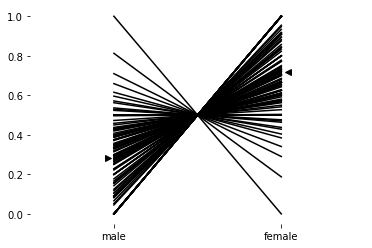

In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42

def male_female_ratio_calculator(MALE_LIST,FEMALE_LIST,TOTAL_LIST):
    
    M_RATIO_LIST=[]
    F_RATIO_LIST=[]
    
    for i in range(len(TOTAL_LIST)):
        if (MALE_LIST[i]>0) and (FEMALE_LIST[i]>0):
            M_RATIO=MALE_LIST[i]/TOTAL_LIST[i]
            F_RATIO=1-M_RATIO
            M_RATIO_LIST.append(M_RATIO)
            F_RATIO_LIST.append(F_RATIO)
        elif (MALE_LIST[i]==0) and (FEMALE_LIST[i]==0):
            M_RATIO=0
            F_RATIO=1-M_RATIO
            M_RATIO_LIST.append(M_RATIO)
            F_RATIO_LIST.append(F_RATIO)            
        elif (MALE_LIST[i]==0) and (FEMALE_LIST[i]>0):
            M_RATIO=0
            F_RATIO=1-M_RATIO
            M_RATIO_LIST.append(M_RATIO)
            F_RATIO_LIST.append(F_RATIO)
        elif (FEMALE_LIST[i]==0) and (MALE_LIST[i]>0):
            M_RATIO=1
            F_RATIO=1-M_RATIO
            M_RATIO_LIST.append(M_RATIO)
            F_RATIO_LIST.append(F_RATIO)
        
    return M_RATIO_LIST,F_RATIO_LIST



### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/field_trap_jsonfiles_dir/

with open(path+'field_parameters_kh.json', 'r') as file:
    data = json.load(file)
file.close()


### these date meet the conditions "red wine+vinegar","D.suzukii",and "starvation"

date_list=["20231008",'20231012','20240724','20240807','20240819','20240826',
           '20240905','20240905','20240910','20240923','20241006']


male_list=[]
female_list=[]
total_list=[]


for date in date_list:
    for trap in data['collections'][date]:
        if trap!='all':
            male_list.append(data['collections'][date][trap]['male'])
            female_list.append(data['collections'][date][trap]['female'])
            total_list.append(data['collections'][date][trap]['total'])
            
m_ratio_list,f_ratio_list=male_female_ratio_calculator(male_list,female_list,total_list)    

m_mean_ratio=np.mean(m_ratio_list)
f_mean_ratio=np.mean(f_ratio_list)



fig,ax=plt.subplots()

#ax.set_ylim(0,1)
ax.set_xlim(0.1,0.18)
ax.set_xticks([0.12,0.16],labels=['male','female'])
for spine in ax.spines.values():
    spine.set_visible(False)

    
ax.plot(0.1185,m_mean_ratio,'k>')
ax.plot(0.1615,f_mean_ratio,'k<')
    
for i in range(len(m_ratio_list)):
    ratio_list=[m_ratio_list[i],f_ratio_list[i]]
    if m_ratio_list[i]<=0.5:
        ax.plot([0.12,0.16],ratio_list,c='k')
    else:
        ax.plot([0.12,0.16],ratio_list,c='k')    

        
outpath=path+'analyzed_plot_figures'            
            
#plt.savefig(outpath+'/field_all_traps_m_f_ratio.svg',transparent=True)
plt.savefig(outpath+'/field_all_traps_m_f_ratio.pdf',transparent=True,dpi=300)     
        
    
print(len(total_list))

## new heatmap

Pi1
DOWNwind
Pi6
UPwind
Pi7
UPwind
Pi12
DOWNwind


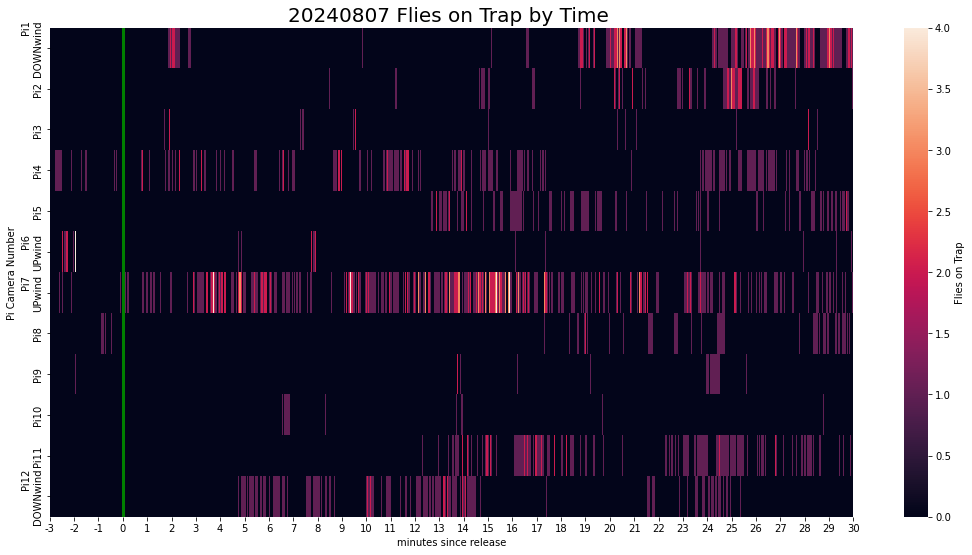

In [13]:
import seaborn as sns
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pdb
import sys
import glob
import os
import re
import pandas as pd
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline

matplotlib.rcParams['pdf.fonttype'] = 42


def calc_sec_since_release(standard,time_stamp):
	zero=int(standard[0:2])*3600+int(standard[3:5])*60+int(standard[6:8])+1
	sec=int(time_stamp[0:2])*3600+int(time_stamp[3:5])*60+int(time_stamp[6:8])
	sec_since_release=sec-zero
	return sec_since_release

def make_accumulation_list(list):
	acc_list=[]
	for i in range(len(list)):
		ele=np.sum(list[:i+1])
		acc_list.append(ele)
	return acc_list



#date=input("what date data you wanna use to make the plot (e.g. 20220725): ")
date='20240807'
#release=input("What time flies were released? (e.g. 093425) :")
release='074202'
if (len(release)==6 and type(int(release))==int):
	pass
else:
	print("please enter 6 numbers (000000-235959)")
	sys.exit()

### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/field_trap_jsonfiles_dir/
json_path=path+'all_traps_final_analysis_json_files/'

list_of_files=sorted(glob.glob(json_path+date+'/*/master_*.json'))

released_time=release[0:2]+':'+release[2:4]+':'+release[4:6]

#c=0

with open(path+'wind_direction.json', 'r') as file:
    data = json.load(file)
file.close()

upwind_list=data["wind_direction"][date]["upwind"]
downwind_list=data["wind_direction"][date]["downwind"]
Color=''

Heat_lst=[]
Trap_name_lst=[]

for file in list_of_files:
    f=open(file)
    data=json.load(f)
    #create lists
    on_trap_list=[]
    in_trap_list=[]
    sec_since_release_list=[]
    actual_timestamp_list=[]


    string=file
    pattern='master'
    match=(re.search(pattern,string))
    
    j_pattern='.json'
    j_match=(re.finditer(j_pattern,string))
    count=0
    for i in j_match:
        if count==1:
            jj_match=i
        count+=1
    
    END=match.end()
    START=jj_match.start()
    DIFF=START-END
    
    if DIFF==24:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+9] ###Pi_X
    else:
        trap_name=string[match.end()+6:-5] ###remove 'master_trap_' and '.json'
        t_name=string[match.end()+6:match.end()+10] ###Pi_X
    #print(t_name[2:])

    for i in data['trap_'+trap_name]:
        for k in data['trap_'+trap_name][i]:
            if i=="flies on trap over time:":
                on_trap_list.append(k)
            elif i=="flies in trap over time:":
                in_trap_list.append(k)
    #		elif i=="seconds since release:":
    #			sec_since_release_list.append(int(k))
            elif i=="actual timestamp:":
                if len(str(int(k)))==5:
                    str_time='0'+str(int(k))[0:1]+':'+str(int(k))[1:3]+':'+str(int(k))[3:5]
                    actual_timestamp_list.append(str_time)
                elif len(str(int(k)))==6:
                    str_time=str(int(k))[0:2]+':'+str(int(k))[2:4]+':'+str(int(k))[4:6]
                    actual_timestamp_list.append(str_time)

    f.close()

    for i in actual_timestamp_list:
        s=calc_sec_since_release(released_time,i)
        sec_since_release_list.append(s)

    on_trap_acc_list=make_accumulation_list(on_trap_list)
    in_trap_acc_list=make_accumulation_list(in_trap_list)

    Heat_lst.append(on_trap_list)
    Trap_name_lst.append(t_name)


fig,ax=plt.subplots(figsize=(18,9))

sorted_Heat_lst=[]
sorted_Trap_name_lst=sorted(Trap_name_lst,key=len)
#print(sorted_Trap_name_lst)
for i in sorted_Trap_name_lst:
    for j in Trap_name_lst:
        if i==j:
            ind=Trap_name_lst.index(j)
            sorted_Heat_lst.append(Heat_lst[ind])

for name in sorted_Trap_name_lst:
    if int(name[2:]) in upwind_list:
        print(sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nUPwind')
        sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]=sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nUPwind'
    elif int(name[2:]) in downwind_list:
        print(sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nDOWNwind')
        sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]=sorted_Trap_name_lst[sorted_Trap_name_lst.index(name)]+'\nDOWNwind'

    
sorted_heat_df=pd.DataFrame(sorted_Heat_lst,index=sorted_Trap_name_lst)
hm=sns.heatmap(data=sorted_heat_df,cbar_kws={"label":"Flies on Trap"}) 

ax.set_xticks(np.arange(0,len(sorted_Heat_lst[0])+1,60))
ax.set_xticklabels(np.arange(-3,int(((len(sorted_Heat_lst[0])/60)-3+1)),1),rotation=0) ###3 mins before release + 30mins after release
ax.axvline(180,c="g",lw=3)
ax.set_xlabel('minutes since release')
ax.set_ylabel('Pi Camera Number')
ax.set_title(date+" Flies on Trap by Time ",fontsize=20)

out_path=path+'analyzed_plot_figures/'
ex_path=out_path+date

# Check whether the specified path exists or not
#isExist = os.path.exists(ex_path)

#if not isExist:  
  # Create a new directory because it does not exist 
#    os.makedirs(ex_path)

#plt.savefig(ex_path+'/'+date+'_hetmap.pdf',transparent=True)

In [14]:
sorted_heat_df

,0,1,2,3,4,5,6,7,8,9,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
Pi1\nDOWNwind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,0.0
Pi2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
Pi3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi6\nUPwind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Pi7\nUPwind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
Pi8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Pi9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
series_list=[]
name_list=[6,7,5,8,4,9,3,10,2,11,1,12]


for num in name_list:
    tmp_series_list=[]
    for i in sorted_heat_df.iloc:
        if str(num) in i.name:
            #print(i.name)
            tmp_series_list.append(i.name)
            if len(tmp_series_list)==1:
                #print(tmp_series_list[0])
                #print(i)
            #tmp_series_list_r=tmp_series_list[0]
                series_list.append(i)
            
concat_df=pd.concat([series_list[0],series_list[1],series_list[2],series_list[3],series_list[4],series_list[5],
          series_list[6],series_list[7],series_list[8],series_list[9],series_list[10],series_list[11]],axis=1)



transposed_df=concat_df.transpose()


transposed_df

,0,1,2,3,4,5,6,7,8,9,...,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
Pi6\nUPwind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Pi7\nUPwind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
Pi5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Pi4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pi2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
Pi11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
import re

def get_string_between(text, start_string, end_string):
  """
  Extracts the string located between two specified strings in a given text.

  Args:
    text: The main string to search within.
    start_string: The string marking the beginning of the desired substring.
    end_string: The string marking the end of the desired substring.

  Returns:
    The extracted substring, or None if either start or end string is not found,
    or if the end string appears before the start string.
  """
  try:
    start_index = text.index(start_string) + len(start_string)
    end_index = text.index(end_string, start_index)
    return text[start_index:end_index]
  except ValueError:
    return None

# Example usage
text = "This is a test [sample] string."
start_string = "["
end_string = "]"
result = get_string_between(text, start_string, end_string)

if result:
  print(f"Extracted string: {result}")
else:
  print("Start or end string not found, or invalid order.")


# Example using regular expressions for more complex scenarios
def get_string_between_regex(text, start_pattern, end_pattern):
    """
    Extracts a string between two patterns using regular expressions.

    Args:
        text: The string to search within.
        start_pattern: The regex pattern for the start delimiter.
        end_pattern: The regex pattern for the end delimiter.

    Returns:
        The extracted string or None if not found.
    """
    match = re.search(f'{start_pattern}(.*?){end_pattern}', text)
    return match.group(1) if match else None

text = "Begin--content_to_extract--End"
start_pattern = r'--'
end_pattern = r'--'

extracted_content = get_string_between_regex(text, start_pattern, end_pattern)

if extracted_content:
    print(f"Extracted content: {extracted_content}")
else:
    print("No match found.")

Extracted string: sample
Extracted content: content_to_extract


In [17]:
def get_travel_time(release_time,first_arrival):
    released=int(release_time[:2])*3600+int(release_time[2:4])*60+int(release_time[4:])
    arrival=int(first_arrival[:2])*3600+int(first_arrival[2:4])*60+int(first_arrival[4:])
    travel_time=arrival-released
    return travel_time


def get_travel_time_list(DATE,PI_NAME_LIST,PATH):
    
    with open(PATH+'field_parameters_kh.json', 'r') as file:
        data=json.load(file)
    file.close()
    
    release_time=data["time_of_fly_release"][DATE]
    released=int(release_time[:2])*3600+int(release_time[3:5])*60+int(release_time[6:])
    
    with open(PATH+'first_arrival_time_by_eyes.json', 'r') as file:
        first_arrival_data=json.load(file)
    file.close()

    first_arrival_time_list=[]    
    travel_time_list=[]
    
    for n in PI_NAME_LIST:
        for i in first_arrival_data['first_arrival_frame']:
            if DATE in i:
                pi=get_string_between(i,"Pi","_")
                if str(n)==pi:
                    #print(str(first_arrival_data['first_arrival_frame'][i]))
                    if first_arrival_data['first_arrival_frame'][i]!="N/A":
                        first_arrival_time_list.append(first_arrival_data['first_arrival_frame'][i])
                    elif first_arrival_data['first_arrival_frame'][i]=="N/A":
                        first_arrival_time_list.append("N/A")
    for i in first_arrival_time_list:
        print(i)
        if i!="N/A":
            arrival=int(i[:2])*3600+int(i[2:4])*60+int(i[4:])
            travel_time=arrival-released
            travel_time_list.append(travel_time)
        elif i=="N/A":
            travel_time_list.append(np.nan)            
        
    return travel_time_list




080545
074455
N/A
080545
080542
080556
N/A
N/A
075311
075806
074355
074646
[1423, 173, nan, 1423, 1420, 1434, nan, nan, 669, 964, 113, 284]


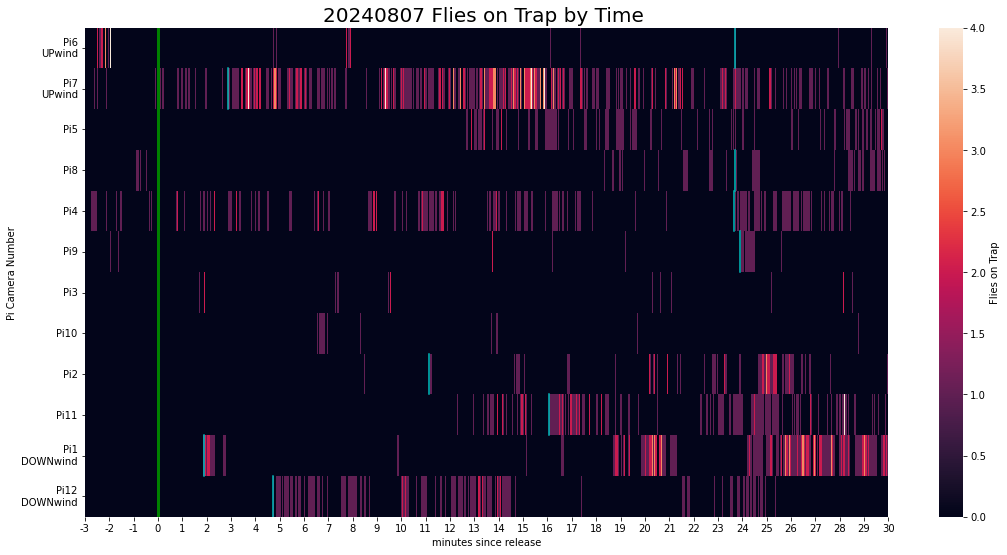

In [19]:
t_lst=get_travel_time_list(date,name_list,path)
print(t_lst)

fig,ax=plt.subplots(figsize=(18,9))

hm=sns.heatmap(data=transposed_df,cbar_kws={"label":"Flies on Trap"}) 

ax.set_xticks(np.arange(0,len(sorted_Heat_lst[0])+1,60))
ax.set_xticklabels(np.arange(-3,int(((len(sorted_Heat_lst[0])/60)-3+1)),1),rotation=0) ###3 mins before release + 30mins after release
ax.axvline(180,c="g",lw=3)
ax.set_xlabel('minutes since release')
ax.set_ylabel('Pi Camera Number')
ax.set_title(date+" Flies on Trap by Time ",fontsize=20)


for i in range(len(t_lst)):
    #travel_time=get_travel_time(release,first_arrival_time_list[i])
    #print(travel_time)
    #print(t_lst[i])
    ax.axvline(x=180+t_lst[i],ymin=(len(t_lst)-i-1)/len(t_lst),ymax=(len(t_lst)-i)/len(t_lst),c='c')

### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/field_trap_jsonfiles_dir/

outpath=path+'analyzed_plot_figures/'
#plt.savefig(path+'/'+date+'_heatmap.pdf',transparent=True)
#plt.savefig(path+'/field_'+date+'_heatmap.svg',transparent=True)
plt.savefig(outpath+date+'/'+date+'_heatmap_ver2.pdf',transparent=True,dpi=300) 

## Wind arrival time-direction

In [20]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pdb
import pandas as pd
import time
import datetime
import os
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42


def flatten_comprehension(matrix):

    return [item for row in matrix for item in row]

def arr_time_by_wind_dir_getter(distance_list,WIND_DATA,ARRIVAL_DATA):

    upwind_list=[]
    downwind_list=[]
    crosswind_list=[]
    tmp_trap_name_list=[]
    not_cross_trap_name_list=[]

    for date in distance_list:
        for DATE,wind_dir in WIND_DATA['wind_direction'].items():
            tmp_trap_name_list=[]
            for trap,arr_time in ARRIVAL_DATA['first_arrival_time'].items():
                #tmp_trap_name_list=[]
                if date==DATE:
                    for pi in wind_dir['upwind']:
                        if 'Pi'+str(pi)+'_'+date in trap:
                            upwind_list.append(arr_time)
                            tmp_trap_name_list.append(trap)
                    for pi in wind_dir['downwind']:
                        if 'Pi'+str(pi)+'_'+date in trap:
                            downwind_list.append(arr_time)
                            tmp_trap_name_list.append(trap)
            not_cross_trap_name_list.append(tmp_trap_name_list)

    flatten_not_cross_list=flatten_comprehension(not_cross_trap_name_list)        

    for date in distance_list:
        for trap,arr_time in arrival_data['first_arrival_time'].items():
            if (not trap in flatten_not_cross_list) and date in trap:
                #print(trap)
                if arr_time !=None:
                    crosswind_list.append(arr_time)
    return upwind_list,downwind_list,crosswind_list

### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/field_trap_jsonfiles_dir/

wind_json_path=path+'wind_direction.json'
arrival_json_path=path+'first_arrival_time_by_eyes.json'
field_param_json_path=path+'field_parameters_kh.json'


with open(wind_json_path, 'r') as file:
    wind_data=json.load(file)
file.close()

with open(arrival_json_path, 'r') as file:
    arrival_data=json.load(file)
file.close()

with open(field_param_json_path, 'r') as file:
    field_param_data=json.load(file)
file.close()


#wind_data

#arrival_data

dis_50m_list=[]
dis_100m_list=[]


for date,dis in field_param_data["distances"].items():
    if dis=='50m':
        dis_50m_list.append(date)
    elif dis=='100m':
        dis_100m_list.append(date)
'''        
upwind_list=[]
downwind_list=[]
crosswind_list=[]
tmp_trap_name_list=[]
not_cross_trap_name_list=[]

for date in dis_100m_list:
    for DATE,wind_dir in wind_data['wind_direction'].items():
        tmp_trap_name_list=[]
        for trap,arr_time in arrival_data['first_arrival_time'].items():
            #tmp_trap_name_list=[]
            if date==DATE:
                for pi in wind_dir['upwind']:
                    if 'Pi'+str(pi)+'_'+date in trap:
                        upwind_list.append(arr_time)
                        tmp_trap_name_list.append(trap)
                for pi in wind_dir['downwind']:
                    if 'Pi'+str(pi)+'_'+date in trap:
                        downwind_list.append(arr_time)
                        tmp_trap_name_list.append(trap)
        not_cross_trap_name_list.append(tmp_trap_name_list)

flatten_not_cross_list=flatten_comprehension(not_cross_trap_name_list)        
            
for date in dis_100m_list:
    for trap,arr_time in arrival_data['first_arrival_time'].items():
        if (not trap in flatten_not_cross_list) and date in trap:
            crosswind_list.append(arr_time)
'''            


a,b,c=arr_time_by_wind_dir_getter(dis_100m_list,wind_data,arrival_data)
#print(dis_50m_list)
d,e,f=arr_time_by_wind_dir_getter(dis_50m_list,wind_data,arrival_data)

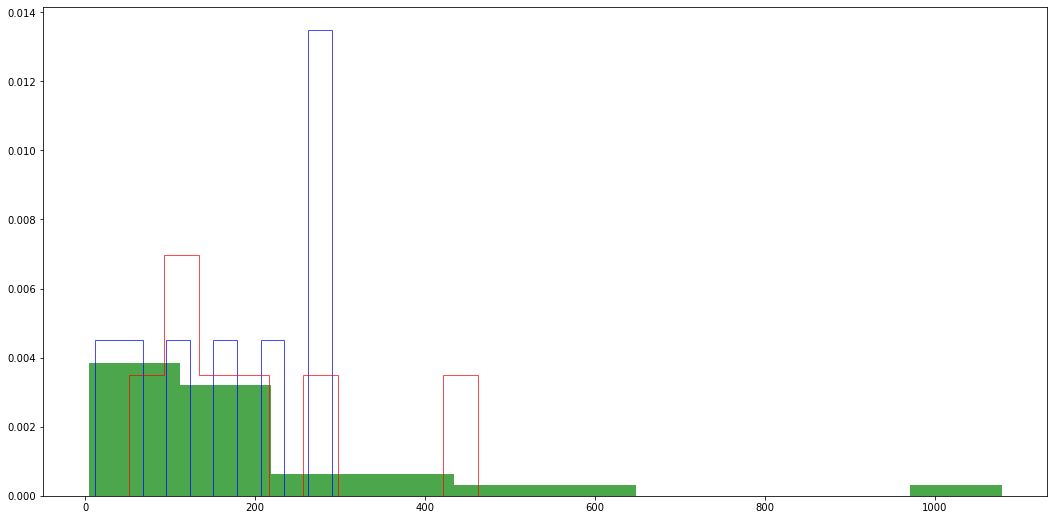

In [21]:
fig,ax=plt.subplots(figsize=(18,9))

ax.hist(a,density=True,histtype='step',alpha=0.7,color='b')
ax.hist(b,density=True,histtype='step',alpha=0.7,color='r')
ax.hist(c,density=True,alpha=0.7,color='g')

outpath=path+'wind_data_files/wind_data_plots/'
plt.savefig(outpath+'first_arrival_by_wind_dir_100m.pdf',transparent=True,dpi=300) 

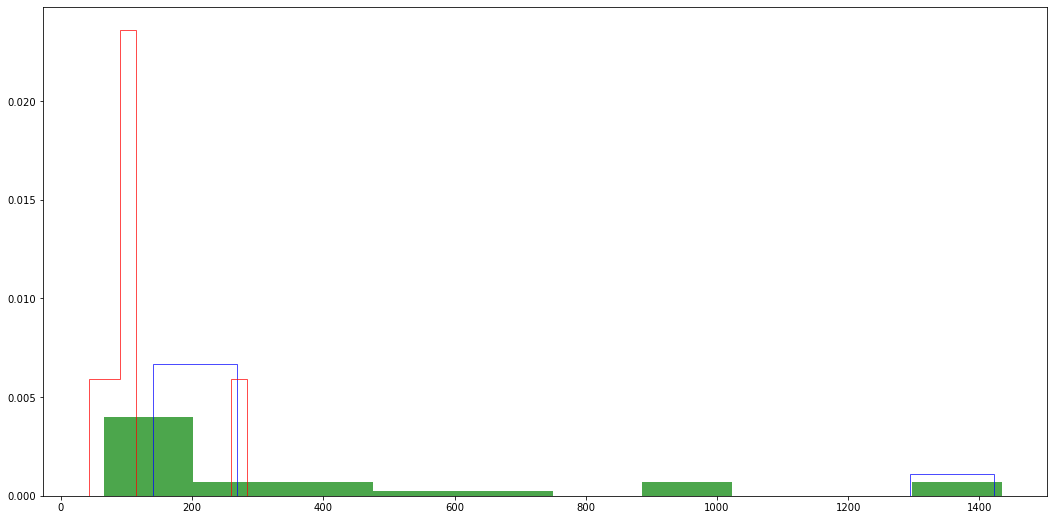

In [22]:
fig,ax=plt.subplots(figsize=(18,9))

ax.hist(d,density=True,histtype='step',alpha=0.7,color='b')
ax.hist(e,density=True,histtype='step',alpha=0.7,color='r')
ax.hist(f,density=True,alpha=0.7,color='g')

outpath=path+'wind_data_files/wind_data_plots/'
plt.savefig(outpath+'first_arrival_by_wind_dir_50m.pdf',transparent=True,dpi=300) 

# First arrival time with median

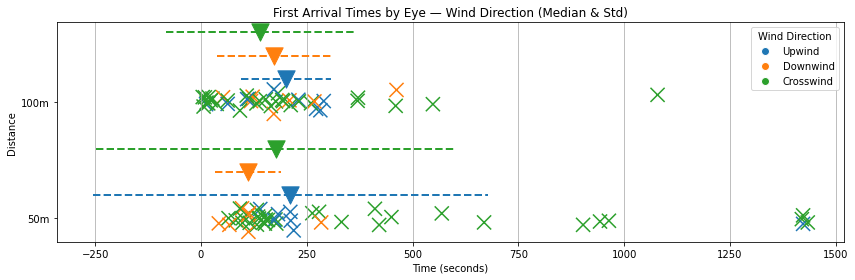

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import json
from matplotlib import rcParams

rcParams['pdf.fonttype'] = 42


### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/"


# Reload data files
with open(path+"wind_direction.json", "r") as f:
    wind_data = json.load(f)

first_arrival_by_eyes = json.load(open(path+"first_arrival_time_by_eyes.json"))
arrival_times = first_arrival_by_eyes["first_arrival_time"]

# Convert to DataFrame
arrival_df = pd.DataFrame(list(arrival_times.items()), columns=["trap_id", "first_arrival_sec"])
arrival_df = arrival_df.dropna()

# Extract trap number and date for mapping
def extract_distance(trap_id):
    date_str = trap_id.split("_")[1][:8]
    if date_str >= "20240905":  # 100m from this date onwards
        return "100m"
    return "50m"

arrival_df["distance"] = arrival_df["trap_id"].apply(extract_distance)

# Build wind position map
trap_wind_position = {}
for date, direction_info in wind_data["wind_direction"].items():
    upwind = set(direction_info.get("upwind", []))
    downwind = set(direction_info.get("downwind", []))
    for trap_num in range(1, 13):
        label = "crosswind"
        if trap_num in upwind:
            label = "upwind"
        elif trap_num in downwind:
            label = "downwind"
        trap_id = f"Pi{trap_num}_{date}000000"
        trap_wind_position[trap_id] = label

# Normalize trap_id
def normalize_trap_id(trap_id):
    parts = trap_id.split("_")
    trap_num = parts[0].replace("Pi", "")
    date = parts[1][:8]
    return f"Pi{int(trap_num)}_{date}000000"

arrival_df["normalized_trap_id"] = arrival_df["trap_id"].apply(normalize_trap_id)
arrival_df["wind_position"] = arrival_df["normalized_trap_id"].map(trap_wind_position)

# Separate data by distance
df_50m = arrival_df[arrival_df["distance"] == "50m"].copy()
df_100m = arrival_df[arrival_df["distance"] == "100m"].copy()

# Prepare jitter for scatter plot
np.random.seed(1)
y_jittered_50m = np.random.normal(loc=0, scale=0.05, size=len(df_50m))
y_jittered_100m = np.random.normal(loc=1, scale=0.05, size=len(df_100m))

# Wind colors
wind_colors = {
    "upwind": "tab:blue",
    "downwind": "tab:orange",
    "crosswind": "tab:green"
}
wind_positions = ["upwind", "downwind", "crosswind"]
y_levels = {
    "50m": {"upwind": 0.2, "downwind": 0.4, "crosswind": 0.6},
    "100m": {"upwind": 1.2, "downwind": 1.4, "crosswind": 1.6}
}

# Assign colors
color_50m = df_50m["wind_position"].map(wind_colors)
color_100m = df_100m["wind_position"].map(wind_colors)

# Function to plot median and std
def plot_median_std(data, y_val, color):
    median = data["first_arrival_sec"].median()
    std = data["first_arrival_sec"].std()
    plt.scatter([median], [y_val], marker='v', s=300, color=color)
    plt.hlines(y=y_val, xmin=median - std, xmax=median + std, colors=color, linestyles='dashed', linewidth=2)

# Create plot
plt.figure(figsize=(12, 4))
plt.scatter(df_50m["first_arrival_sec"], y_jittered_50m, s=200, c=color_50m, marker='x')
plt.scatter(df_100m["first_arrival_sec"], y_jittered_100m, s=200, c=color_100m, marker='x')

# Add median and std by wind category and distance
for wp in wind_positions:
    plot_median_std(df_50m[df_50m["wind_position"] == wp], y_levels["50m"][wp], wind_colors[wp])
    plot_median_std(df_100m[df_100m["wind_position"] == wp], y_levels["100m"][wp], wind_colors[wp])

# Add legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Upwind', markerfacecolor=wind_colors["upwind"], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Downwind', markerfacecolor=wind_colors["downwind"], markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Crosswind', markerfacecolor=wind_colors["crosswind"], markersize=8)
]
plt.legend(handles=legend_elements, title="Wind Direction", loc="upper right")

# Layout
plt.title("First Arrival Times by Eye — Wind Direction (Median & Std)")
plt.xlabel("Time (seconds)")
plt.yticks([0, 1], ["50m", "100m"])
plt.ylabel("Distance")
plt.grid(True, axis='x')
plt.tight_layout()

out_path=path+"wind_data_files/wind_data_plots/"


plt.savefig(out_path+"first_arrival_by_wind_median_std.svg", transparent=True, dpi=300)
plt.savefig(out_path+"first_arrival_by_wind_median_std.pdf", transparent=True, dpi=300)

# First arrival time vs Wind speed

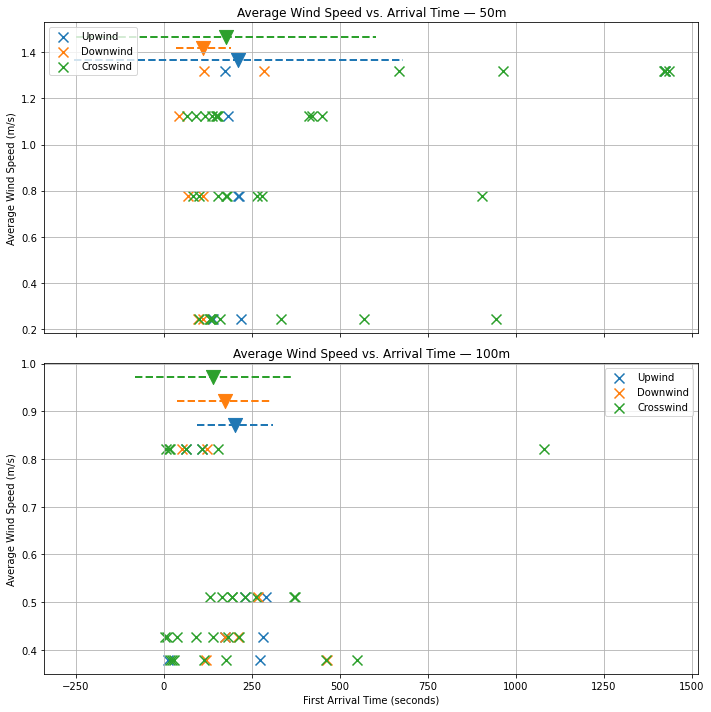

In [13]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['pdf.fonttype'] = 42


### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/"


# === Load data ===
with open(path+"first_arrival_time_by_eyes.json") as f:
    arrival_data = json.load(f)["first_arrival_time"]

with open(path+"wind_direction.json") as f:
    wind_directions = json.load(f)["wind_direction"]

with open(path+"field_parameters_kh.json") as f:
    field_params = json.load(f)
release_times = field_params["time_of_fly_release"]

# === Convert to DataFrame ===
df = pd.DataFrame(list(arrival_data.items()), columns=["trap_id", "first_arrival_sec"]).dropna()

# Extract metadata
df["date"] = df["trap_id"].apply(lambda x: x.split("_")[1][:8])
df["trap_num"] = df["trap_id"].apply(lambda x: int(x.split("_")[0].replace("Pi", "")))
df["distance"] = df["date"].apply(lambda d: "100m" if d >= "20240905" else "50m")
df["normalized_id"] = df.apply(lambda row: f"Pi{row['trap_num']}_{row['date']}000000", axis=1)

# Assign wind direction
def assign_wind_pos(row):
    directions = wind_directions.get(row["date"], {})
    if row["trap_num"] in directions.get("upwind", []):
        return "upwind"
    elif row["trap_num"] in directions.get("downwind", []):
        return "downwind"
    else:
        return "crosswind"

df["wind_position"] = df.apply(assign_wind_pos, axis=1)

wind_speed_dict = {
    "20240724": 1.1238,
    "20240807": 1.3187,
    "20240819": 0.7771,
    "20240826": 0.2442,
    "20240905": 0.5111,
    "20240910": 0.4277,
    "20240923": 0.8213,
    "20241006": 0.3794
}
df["avg_wind_speed_ms"] = df["date"].map(wind_speed_dict)

# === Plot ===
wind_colors = {"upwind": "tab:blue", "downwind": "tab:orange", "crosswind": "tab:green"}
offsets = {"upwind": 0.05, "downwind": 0.10, "crosswind": 0.15}

fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

for ax, distance in zip(axes, ["50m", "100m"]):
    df_sub = df[df["distance"] == distance]
    ymax = df_sub["avg_wind_speed_ms"].max()

    for wp, color in wind_colors.items():
        group = df_sub[df_sub["wind_position"] == wp].dropna(subset=["avg_wind_speed_ms", "first_arrival_sec"])

        # scatter points
        ax.scatter(group["first_arrival_sec"], group["avg_wind_speed_ms"], marker='x', color=color, label=wp.capitalize(), s=100)

        # median/std markers above (with offset to avoid overlap)
        if not group.empty:
            med = group["first_arrival_sec"].median()
            std = group["first_arrival_sec"].std()
            y_shift = ymax + offsets[wp]
            ax.scatter([med], [y_shift], marker='v', s=200, color=color)
            ax.hlines(y=y_shift, xmin=med - std, xmax=med + std, colors=color, linestyles="dashed", linewidth=2)

    ax.set_title(f"Average Wind Speed vs. Arrival Time — {distance}")
    ax.set_ylabel("Average Wind Speed (m/s)")
    ax.grid(True)
    ax.legend()

axes[1].set_xlabel("First Arrival Time (seconds)")
plt.tight_layout()

out_path=path+"wind_data_files/wind_data_plots/"

plt.savefig(out_path+"wind_speed_VS_arrival_time.svg", transparent=True, dpi=300)
plt.savefig(out_path+"wind_speed_VS_arrival_time..pdf", transparent=True, dpi=300)


# cumulative plot

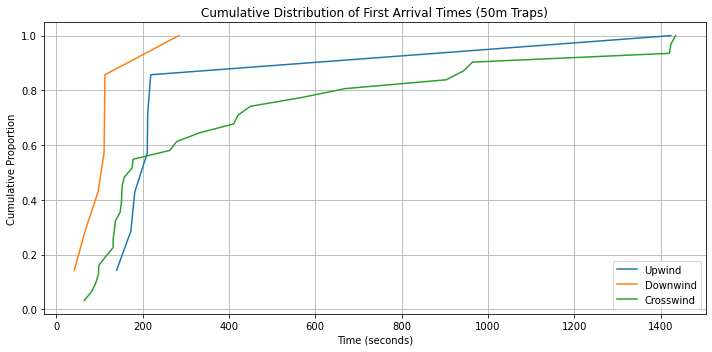

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['pdf.fonttype'] = 42

### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/"



with open(path+"first_arrival_time_by_eyes.json") as f:
    arrival_data = json.load(f)["first_arrival_time"]

with open(path+"wind_direction.json") as f:
    wind_data = json.load(f)["wind_direction"]


# Convert arrival data to DataFrame
df = pd.DataFrame(list(arrival_data.items()), columns=["trap_id", "first_arrival_sec"]).dropna()

# Determine 50m or 100m based on date
def get_distance(trap_id):
    date = trap_id.split("_")[1][:8]
    return "100m" if date >= "20240905" else "50m"

df["distance"] = df["trap_id"].apply(get_distance)

# Build wind direction mapping
trap_wind_position = {}
for date, directions in wind_data.items():
    up = set(directions.get("upwind", []))
    down = set(directions.get("downwind", []))
    for i in range(1, 13):
        trap_id = f"Pi{i}_{date}000000"
        if i in up:
            trap_wind_position[trap_id] = "upwind"
        elif i in down:
            trap_wind_position[trap_id] = "downwind"
        else:
            trap_wind_position[trap_id] = "crosswind"

# Normalize trap_id for matching
def normalize_id(trap_id):
    trap_num = int(trap_id.split("_")[0].replace("Pi", ""))
    date = trap_id.split("_")[1][:8]
    return f"Pi{trap_num}_{date}000000"

df["normalized_id"] = df["trap_id"].apply(normalize_id)
df["wind_position"] = df["normalized_id"].map(trap_wind_position)

# Plot cumulative distribution for 50m
plt.figure(figsize=(10, 5))
colors = {"upwind": "tab:blue", "downwind": "tab:orange", "crosswind": "tab:green"}

for wp in ["upwind", "downwind", "crosswind"]:
    subset = df[(df["distance"] == "50m") & (df["wind_position"] == wp)]
    times = subset["first_arrival_sec"].dropna().sort_values().to_numpy()
    y = np.arange(1, len(times) + 1) / len(times)
    plt.plot(times, y, label=wp.capitalize(), color=colors[wp])

plt.title("Cumulative Distribution of First Arrival Times (50m Traps)")
plt.xlabel("Time (seconds)")
plt.ylabel("Cumulative Proportion")
plt.grid(True)
plt.legend()
plt.tight_layout()

out_path=path+"wind_data_files/wind_data_plots/"

plt.savefig(out_path+"cumulative_arrival_50m_by_wind.svg", transparent=True, dpi=300)
plt.savefig(out_path+"cumulative_arrival_50m_by_wind.pdf", transparent=True, dpi=300)

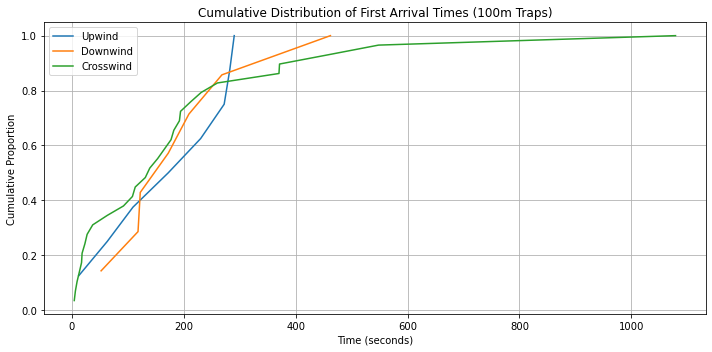

In [2]:
plt.figure(figsize=(10, 5))

for wp in ["upwind", "downwind", "crosswind"]:
    subset = df[(df["distance"] == "100m") & (df["wind_position"] == wp)]
    times = subset["first_arrival_sec"].dropna().sort_values().to_numpy()
    y = np.arange(1, len(times) + 1) / len(times)
    plt.plot(times, y, label=wp.capitalize(), color=colors[wp])

plt.title("Cumulative Distribution of First Arrival Times (100m Traps)")
plt.xlabel("Time (seconds)")
plt.ylabel("Cumulative Proportion")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig(out_path+"cumulative_arrival_100m_by_wind.svg", transparent=True, dpi=300)
plt.savefig(out_path+"cumulative_arrival_100m_by_wind.pdf", transparent=True, dpi=300)


# Recapture rate vs wind direction

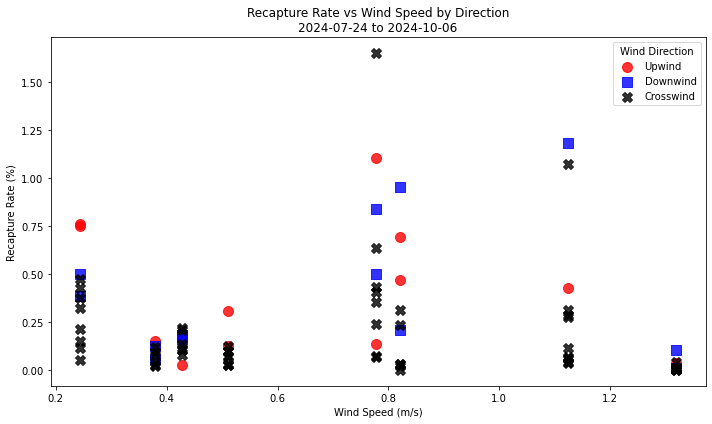

In [11]:
# Re-import everything after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datetime import datetime, timedelta
import pytz
import numpy as np
import json

# Font setting
rcParams['pdf.fonttype'] = 42



### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/"



# Reload JSON files
with open(path+"field_parameters_kh.json") as f:
    field_data = json.load(f)

with open(path+"wind_direction.json") as f:
    wind_direction_data = json.load(f)["wind_direction"]

# Date to file map
file_date_map = {
    "20240724": path+"wind_data_files/anemometer_2024_07_24.txt",
    "20240807": path+"wind_data_files/anemometer_2024_08_07.txt",
    "20240819": path+"wind_data_files/anemometer_2024_08_19.txt",
    "20240826": path+"wind_data_files/anemometer_2024_08_26.txt",
    "20240905": path+"wind_data_files/anemometer_2024_09_05.txt",
    "20240910": path+"wind_data_files/anemometer_2024_09_10.txt",
    "20240923": path+"wind_data_files/anemometer_2024_09_23.txt",
    "20241006": path+"wind_data_files/anemometer_2024_10_06.txt",
}

oregon_tz = pytz.timezone("America/Los_Angeles")
data_records = []

for date_key, filepath in file_date_map.items():
    collections = field_data["collections"][date_key]
    released_total = field_data["estimated_number_of_flies_released"][date_key]
    num_traps = field_data["number_of_traps"][date_key]
    wind_groups = wind_direction_data.get(date_key, {"upwind": [], "downwind": []})

    # Load anemometer data
    df = pd.read_csv(filepath, sep="\s+", header=None, names=["timestamp", "wind_dir", "wind_speed_mph"])
    df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")
    df["wind_speed_mps"] = df["wind_speed_mph"] * 0.44704

    release_time_str = field_data["time_of_fly_release"][date_key]
    release_local = oregon_tz.localize(datetime.strptime(
        f"{date_key[:4]}-{date_key[4:6]}-{date_key[6:]} {release_time_str}",
        "%Y-%m-%d %H:%M:%S"))
    release_utc = release_local.astimezone(pytz.utc)
    release_dt = pd.to_datetime(release_utc.timestamp(), unit="s")
    window = df[(df["datetime"] >= release_dt) & (df["datetime"] <= release_dt + timedelta(minutes=3))]
    mean_wind_speed = window["wind_speed_mps"].mean()

    for trap_id in range(1, num_traps + 1):
        trap_key = f"trap{trap_id}"
        if trap_key in collections:
            count = collections[trap_key].get("total", 0)
            if trap_id in wind_groups.get("upwind", []):
                direction = "Upwind"
            elif trap_id in wind_groups.get("downwind", []):
                direction = "Downwind"
            else:
                direction = "Crosswind"
            data_records.append({
                "Wind Speed (m/s)": mean_wind_speed,
                "Recapture Rate (%)": 100 * count / released_total,
                "Direction": direction,
                "Date": f"{date_key[:4]}-{date_key[4:6]}-{date_key[6:]}"
            })

# Plot
df_colored = pd.DataFrame(data_records)

color_map = {"Upwind": "red", "Downwind": "blue", "Crosswind": "black"}
marker_map = {"Upwind": "o", "Downwind": "s", "Crosswind": "X"}

plt.figure(figsize=(10, 6))
for direction in ["Upwind", "Downwind", "Crosswind"]:
    group = df_colored[df_colored["Direction"] == direction]
    plt.scatter(group["Wind Speed (m/s)"], group["Recapture Rate (%)"],
                color=color_map[direction], marker=marker_map[direction],
                s=100, alpha=0.8, label=direction)

plt.title("Recapture Rate vs Wind Speed by Direction\n2024-07-24 to 2024-10-06")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Recapture Rate (%)")
plt.legend(title="Wind Direction")
plt.tight_layout()


out_path=path+"wind_data_files/wind_data_plots/"

plt.savefig(out_path+"recapture_vs_wind_direction_complete.svg", transparent=True, dpi=300)
plt.savefig(out_path+"recapture_vs_wind_direction_complete.pdf", transparent=True, dpi=300)


# WBI-projected wind speed plot

🔧 Step-by-Step Processing: Wind Bias Index (WBI) Computation
① Retrieving the Release Time
Extract the release time (e.g., "07:42:02") for the target date (e.g., "20240724") from field_parameters_kh.json.

Combine it with the date to form "20240724 07:42:02" and convert it into a datetime object.

Set the timezone to Oregon local time (UTC-7).

Purpose: To synchronize the wind data precisely with the timing of insect release.

② Loading Wind Data and Extracting a 3-Minute Window
Load wind data from anemometer_YYYY_MM_DD.txt, including:

timestamp (UNIX time)

direction (wind-from angle, degrees)

speed_mph (wind speed in mph)

Convert timestamp to datetime using datetime.fromtimestamp() with UTC-7.

Filter the data for exactly 3 minutes following the release time.

Convert wind speed from mph to m/s:

m/s
=
mph
×
0.44704
m/s=mph×0.44704
Purpose: To capture wind conditions immediately affecting initial insect dispersal.

③ Calculating Average Wind Speed and Direction
Convert wind directions (from) to radians and average the sin and cos components:

𝜃
ˉ
from
=
arctan
⁡
2
(
mean
(
sin
⁡
)
,
mean
(
cos
⁡
)
)
θ
ˉ
  
from
​
 =arctan2(mean(sin),mean(cos))
Rotate by 180° to get the wind-to direction:

𝜃
to
=
𝜃
from
+
𝜋
θ 
to
​
 =θ 
from
​
 +π
Compute wind vector:

𝑊
𝑥
=
cos
⁡
(
𝜃
to
)
,
𝑊
𝑦
=
sin
⁡
(
𝜃
to
)
Wx=cos(θ 
to
​
 ),Wy=sin(θ 
to
​
 )
Compute average wind speed 
𝑣
v (scalar)

Purpose: To define the direction and magnitude of wind affecting the insects.

④ Retrieving Trap Collection Data
Extract "total" collection count from field_parameters_kh.json["collections"][date_str][trapX]

Compute the total number of insects caught across all traps.

Use predefined trap_angles to assign each trap its spatial angle (e.g., trap1 = South = 180°)

Purpose: To associate trap position and performance.

⑤ Computing Wind Bias Index (WBI)
For each trap:

Step 1. Convert trap angle to unit vector:
𝑇
𝑥
=
cos
⁡
(
𝜙
)
,
𝑇
𝑦
=
sin
⁡
(
𝜙
)
Tx=cos(ϕ),Ty=sin(ϕ)
Step 2. Compute alignment with wind direction:
alignment
=
𝑊
𝑥
⋅
𝑇
𝑥
+
𝑊
𝑦
⋅
𝑇
𝑦
alignment=Wx⋅Tx+Wy⋅Ty
Step 3. Compute catch ratio:
ratio
=
trap count
total count
ratio= 
total count
trap count
​
 
Step 4. Compute WBI (as defined by Kay):
WBI
=
alignment
×
ratio
×
𝑣
WBI=alignment×ratio×v
Purpose: To quantify how aligned the trap is with wind direction, adjusted by its capture proportion and wind strength.

⑥ Calculating Projected Wind Speed for Each Trap
Compute the wind component directly aligned with the trap's direction:

𝑣
proj
=
𝑣
×
alignment
v 
proj
​
 =v×alignment
Interpretation:

𝑣
proj
>
0
v 
proj
​
 >0: wind is blowing toward the trap (tailwind)

𝑣
proj
<
0
v 
proj
​
 <0: wind is blowing away from the trap (headwind)

𝑣
proj
=
0
v 
proj
​
 =0: wind is orthogonal to the trap (crosswind)

Purpose: To evaluate how much wind is "hitting" each trap directionally.

⑦ Plotting and Visualization
Two types of scatter plots are created:

x-axis = mean wind speed, y-axis = WBI
→ Measures how increasing wind speed correlates with directional bias.

x-axis = projected wind speed, y-axis = WBI
→ Incorporates wind alignment directly into interpretation of trap effectiveness.

Each trap is visually categorized based on its alignment with wind:

🔴 Red Circle = upwind

🔵 Blue Square = downwind

❌ Black Cross = crosswind



In [21]:

data_path=path+"wind_data_files/"
wind_txt=data_path+"anemometer_"+wind_data+".txt"






### 11 or 12?

NameError: name 'wind_data' is not defined

In [19]:
import matplotlib
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, timezone
matplotlib.rcParams['pdf.fonttype'] = 42


def prepare_wbi_dataframe_with_projection(date_str, wind_txt_path):
    with open(param_path, "r") as f:
        params = json.load(f)
    with open(wind_dir_path, "r") as f:
        wind_info = json.load(f)

    release_time_str = params["time_of_fly_release"][date_str]
    release_time = datetime.strptime(date_str + " " + release_time_str, "%Y%m%d %H:%M:%S").replace(tzinfo=oregon_tz)

    df = pd.read_csv(wind_txt_path, sep="\s+", header=None, names=["timestamp", "direction", "speed_mph"])
    df["datetime"] = df["timestamp"].astype(float).apply(lambda x: datetime.fromtimestamp(x, tz=oregon_tz))
    df = df[(df["datetime"] >= release_time) & (df["datetime"] <= release_time + timedelta(minutes=3))].copy()
    df["speed_mps"] = df["speed_mph"] * 0.44704
    v = df["speed_mps"].mean()

    df["dir_rad"] = np.radians(df["direction"])
    wind_from_rad = np.arctan2(np.mean(np.sin(df["dir_rad"])), np.mean(np.cos(df["dir_rad"])))
    wind_to_rad = (wind_from_rad + np.pi) % (2 * np.pi)
    Wx, Wy = np.cos(wind_to_rad), np.sin(wind_to_rad)

    traps = params["collections"][date_str]
    trap_counts = {k: traps[k]["total"] for k in traps if k.startswith("trap")}
    total = sum(trap_counts.values())

    records = []
    for trap_id, angle in trap_angles.items():
        if trap_id not in trap_counts:
            continue
        angle_rad = np.radians(angle)
        Tx = np.cos(angle_rad)
        Ty = np.sin(angle_rad)
        alignment = Wx * Tx + Wy * Ty
        ratio = trap_counts[trap_id] / total
        local_wbi = alignment * ratio * v
        projected_speed = alignment * v  # ← 
        trap_num = int(trap_id.replace("trap", ""))
        category = (
            "upwind" if trap_num in wind_info["wind_direction"][date_str]["upwind"]
            else "downwind" if trap_num in wind_info["wind_direction"][date_str]["downwind"]
            else "crosswind"
        )
        records.append({
            "Date": date_str,
            "Trap": trap_id,
            "Trap Number": trap_num,
            "Wind Speed (m/s)": v,
            "Local WBI": local_wbi,
            "Projected Wind Speed": projected_speed,
            "Category": category
        })

    return pd.DataFrame(records)


### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/"


oregon_tz = timezone(timedelta(hours=-7))

param_path = path+"field_parameters_kh.json"
wind_dir_path = path+"wind_direction.json"

trap_angles = {
    f"trap{i}": angle for i, angle in enumerate(
        [180, 210, 240, 270, 300, 330, 0, 30, 60, 90, 120, 150], start=1)}


marker_map={
    "upwind":("red","o"),
    "downwind":("blue","s"),
    "crosswind":("black","x")
}




In [20]:
print(trap_angles)

{'trap1': 180, 'trap2': 210, 'trap3': 240, 'trap4': 270, 'trap5': 300, 'trap6': 330, 'trap7': 0, 'trap8': 30, 'trap9': 60, 'trap10': 90, 'trap11': 120, 'trap12': 150}


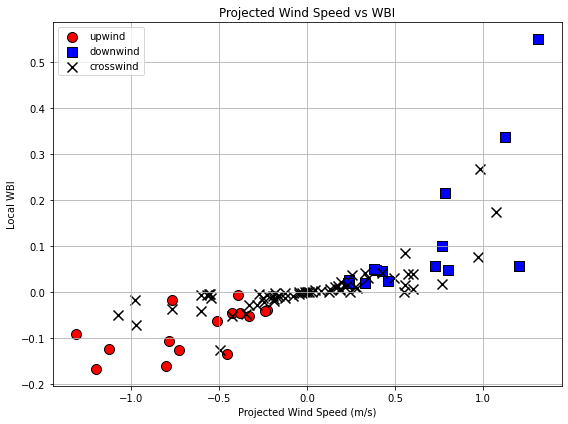

In [9]:


# Prepare dataframes for both days
df_0724 = prepare_wbi_dataframe_with_projection("20240724", path+"wind_data_files/anemometer_2024_07_24.txt")
df_0807 = prepare_wbi_dataframe_with_projection("20240807", path+"wind_data_files/anemometer_2024_08_07.txt")
df_0819 = prepare_wbi_dataframe_with_projection("20240819", path+"wind_data_files/anemometer_2024_08_19.txt")
df_0826 = prepare_wbi_dataframe_with_projection("20240826", path+"wind_data_files/anemometer_2024_08_26.txt")
df_0905 = prepare_wbi_dataframe_with_projection("20240905", path+"wind_data_files/anemometer_2024_09_05.txt")
df_0910 = prepare_wbi_dataframe_with_projection("20240910", path+"wind_data_files/anemometer_2024_09_10.txt")
df_0923 = prepare_wbi_dataframe_with_projection("20240923", path+"wind_data_files/anemometer_2024_09_23.txt")
df_1006 = prepare_wbi_dataframe_with_projection("20241006", path+"wind_data_files/anemometer_2024_10_06.txt")
df_combined_proj = pd.concat([df_0724, df_0807,df_0819,df_0826,df_0905,df_0910,df_0923,df_1006], ignore_index=True)





plt.figure(figsize=(8, 6))
for category, (color, marker) in marker_map.items():
    subset = df_combined_proj[df_combined_proj["Category"] == category]
    plt.scatter(
        subset["Projected Wind Speed"], subset["Local WBI"],
        c=color, marker=marker, label=category, s=100, edgecolor='k' if marker != 'x' else None
    )

plt.xlabel("Projected Wind Speed (m/s)")
plt.ylabel("Local WBI")
plt.title("Projected Wind Speed vs WBI")
plt.grid(True)
plt.legend(loc="upper left")
plt.tight_layout()
#plt.show()

out_path=path+"wind_data_files/wind_data_plots/"

plt.savefig(out_path+'proj_wind_spd_vs_WBI.svg', transparent=True, dpi=300)
plt.savefig(out_path+'proj_wind_spd_vs_WBI.pdf', transparent=True, dpi=300)

# Net Wind Bias (NWB) plot

In [43]:
import pandas as pd
import numpy as np
import datetime
import json
import os
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42

TRAP_DEGREES = {
    "Pi7": 0, "Pi6": 330, "Pi5": 300, "Pi4": 270,
    "Pi3": 240, "Pi2": 210, "Pi1": 180, "Pi12": 150,
    "Pi11": 120, "Pi10": 90, "Pi9": 60, "Pi8": 30
}

def load_release_time(field_params_path, date_str):
    with open(field_params_path) as f:
        params = json.load(f)
    timestamp = params["time_of_fly_release"][date_str]
    dt = datetime.datetime.strptime(date_str + " " + timestamp, "%Y%m%d %H:%M:%S")
    return dt

def load_collections(field_params_path, date_str):
    with open(field_params_path) as f:
        params = json.load(f)
    return params["collections"][date_str]

def load_anemometer(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None,
                     names=["timestamp", "direction", "speed_mph"])
    df["datetime_utc"] = pd.to_datetime(df["timestamp"], unit="s")
    df["datetime_pdt"] = df["datetime_utc"] - pd.Timedelta(hours=7)
    return df

def compute_wind_stats(df, release_time, window_min=3):
    end_time = release_time + datetime.timedelta(minutes=window_min)
    df_win = df[(df["datetime_pdt"] >= release_time) & (df["datetime_pdt"] <= end_time)].copy()
    if df_win.empty:
        raise ValueError("No wind data in 3-minute window.")
    v = df_win["speed_mph"] * 0.44704
    avg_speed = v.mean()
    theta_rad = np.deg2rad(df_win["direction"])
    mean_sin = np.mean(np.sin(theta_rad))
    mean_cos = np.mean(np.cos(theta_rad))
    wind_from_rad = np.arctan2(mean_sin, mean_cos)
    wind_to_rad = (wind_from_rad + np.pi) % (2 * np.pi)
    wind_to_deg = np.rad2deg(wind_to_rad)
    print(wind_to_deg)
    return avg_speed, wind_to_deg

def compute_nwb(trap_totals, trap_angles, wind_to_deg):
    numerator = 0
    denominator = 0
    for trap, angle in trap_angles.items():
        key = trap.lower().replace("pi", "trap")
        total_info = trap_totals.get(key, {})
        total = total_info.get("total", 0)
        theta = (angle - wind_to_deg) % 360
        alignment = np.cos(np.deg2rad(theta))
        numerator += total * alignment
        denominator += total
        #print(trap)
        #print(angle)
        #print(alignment)
        #print(total)
    return numerator / denominator if denominator != 0 else np.nan

def analyze_nwb(date_str, field_path, wind_file_path):
    release_time = load_release_time(field_path, date_str)
    trap_totals = load_collections(field_path, date_str)
    wind_df = load_anemometer(wind_file_path)
    avg_speed, wind_to_deg = compute_wind_stats(wind_df, release_time)
    nwb = compute_nwb(trap_totals, TRAP_DEGREES, wind_to_deg)
    return avg_speed, nwb



### Local
path='/media/flyranch/14TB_Backup/field_release/'
### Box
#path=Projects/Field_Trap/"

In [54]:

wind_spd_list=[]
NWB_list=[]

param_json=path+'field_parameters_kh.json'
date_list=["20240724","20240807","20240819","20240826","20240905","20240910","20240923","20241006"]
windtxt_list=[path+"wind_data_files/anemometer_2024_07_24.txt",
             path+"wind_data_files/anemometer_2024_08_07.txt",
             path+"wind_data_files/anemometer_2024_08_19.txt",
             path+"wind_data_files/anemometer_2024_08_26.txt",
             path+"wind_data_files/anemometer_2024_09_05.txt",
             path+"wind_data_files/anemometer_2024_09_10.txt",
             path+"wind_data_files/anemometer_2024_09_23.txt",
             path+"wind_data_files/anemometer_2024_10_06.txt"]

for i in date_list:
    spd,nwb=analyze_nwb(i,param_json,windtxt_list[date_list.index(i)])
    wind_spd_list.append(spd)
    NWB_list.append(nwb)
    
print(wind_spd_list)
print(np.round(NWB_list,2))

179.48965492080475
174.5209779982059
50.525512030398474
340.55784230958284
123.41168413548168
36.10355423028613
197.2450471220478
209.53749461017807
[1.1238275768364383, 1.318749845542572, 0.7771257321230736, 0.24416832776231884, 0.511066753089672, 0.4277301411405369, 0.8212675773693829, 0.3794144082583625]
[ 0.46  0.33 -0.06 -0.17 -0.38  0.11  0.03 -0.03]


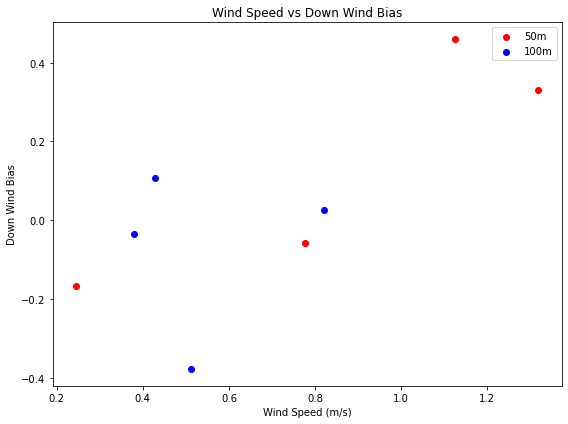

In [45]:
plt.figure(figsize=(8, 6))
# 50m
plt.scatter(wind_spd_list[:4],NWB_list[:4],c='r',label='50m')
# 100m
plt.scatter(wind_spd_list[4:],NWB_list[4:],c='b',label='100m')

plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Down Wind Bias")
plt.title("Wind Speed vs Down Wind Bias")
plt.tight_layout()
plt.legend()
#plt.show()

out_path=path+"wind_data_files/wind_data_plots/"

plt.savefig(out_path+'wind_spd_vs_NWB.svg', transparent=True, dpi=300)
plt.savefig(out_path+'wind_spd_vs_NWB.pdf', transparent=True, dpi=300)

179.48965492080475
174.5209779982059
50.525512030398474
340.55784230958284
123.41168413548168
36.10355423028613
197.2450471220478
209.53749461017807


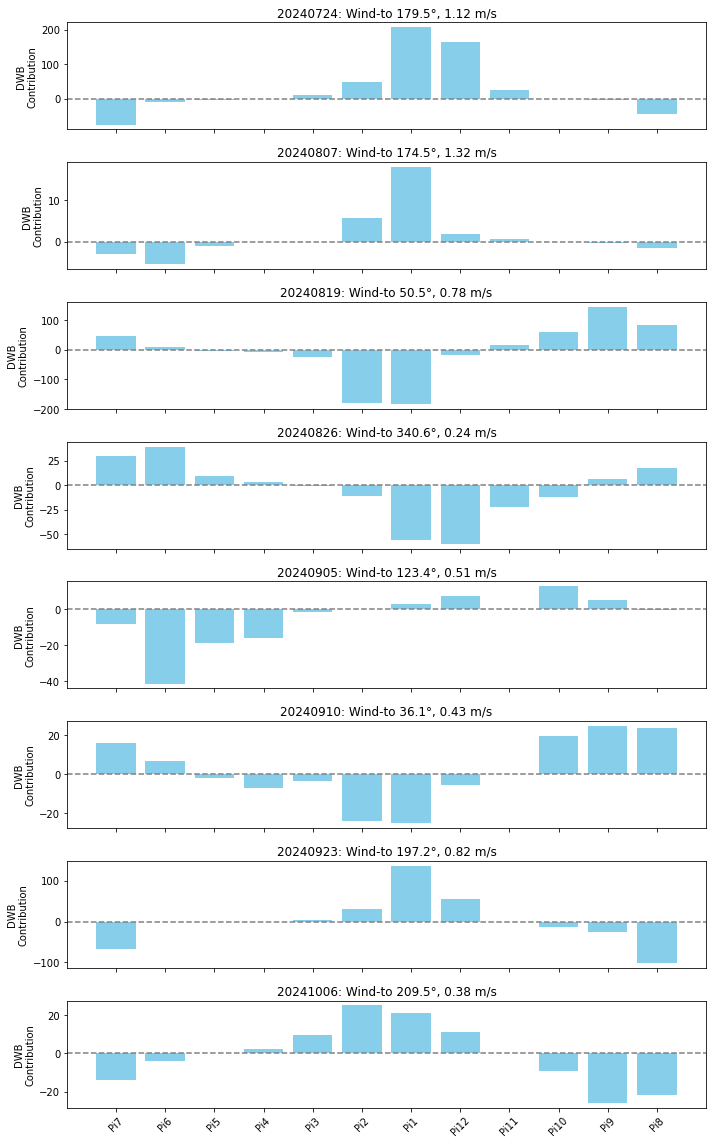

In [51]:
def compute_trapwise_nwb_contributions(date, wind_path, field_params):
    release_str = field_params["time_of_fly_release"][date]
    release_time = datetime.datetime.strptime(date + " " + release_str, "%Y%m%d %H:%M:%S")
    trap_totals = field_params["collections"][date]
    wind_df = load_anemometer(wind_path)
    speed, wind_to_deg = compute_wind_stats(wind_df, release_time)

    trap_labels = []
    contributions = []
    for trap, angle in TRAP_DEGREES.items():
        key = trap.lower().replace("pi", "trap")
        total_info = trap_totals.get(key, {})
        total = total_info.get("total", 0)
        theta = (angle - wind_to_deg) % 360
        alignment = np.cos(np.deg2rad(theta))
        contribution = total * alignment
        trap_labels.append(trap)
        contributions.append(contribution)

    return trap_labels, contributions, wind_to_deg, speed


with open(param_json) as f:
    field_params = json.load(f)

num_days = len(date_list)
fig, axs = plt.subplots(num_days, 1, figsize=(10, 2 * num_days), sharex=True)

for i, (date, wind_path) in enumerate(zip(date_list, windtxt_list)):
    try:
        labels, contribs, wind_dir, avg_spd = compute_trapwise_nwb_contributions(date, wind_path, field_params)
        axs[i].bar(labels, contribs, color='skyblue')
        axs[i].axhline(0, color='gray', linestyle='--')
        axs[i].set_ylabel("DWB\nContribution")
        axs[i].set_title(f"{date}: Wind-to {wind_dir:.1f}°, {avg_spd:.2f} m/s")
    except Exception as e:
        axs[i].text(0.5, 0.5, f"Error on {date}: {e}", transform=axs[i].transAxes,
                    ha='center', va='center', color='red')
        axs[i].set_axis_off()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()